**Importing all required libraries**

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
pip install mysql-connector-python

In [0]:
import mysql.connector
from mysql.connector import Error

**Getting the data from SQL database**

In [0]:
def get_data(sqlst):
  df=pd.DataFrame()
  try:
    connection = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone1',user='student',password='student')
    if connection.is_connected():
      db_Info = connection.get_server_info()
      print("Connected to MySQL Server version", db_Info)
      df=pd.read_sql(sqlst, connection)
      return df
  except Error as e:
      print("Error while connecting to MySQL", e)
      return None
  finally:
      if (connection.is_connected()):
        print("MySQL connection is closed")


**Analysis of event_data dataset for given states**

In [0]:
df_events_mp=pd.DataFrame()
df_events_cht=pd.DataFrame()
df_events_utr=pd.DataFrame()
df_events_jk=pd.DataFrame()
df_events_goa=pd.DataFrame()
df_events_nag=pd.DataFrame()

sqlmp="select event_id, CAST(device_id as CHAR) device_id, timestamp, longitude, latitude, city, state from events_data where state in  ('MadhyaPradesh')"
sqlcht="select event_id, CAST(device_id as CHAR) device_id, timestamp, longitude, latitude, city, state from events_data where state in  ('Chhattisgarh')"
sqlutr="select event_id, CAST(device_id as CHAR) device_id, timestamp, longitude, latitude, city, state from events_data where state in  ('Uttaranchal')"
sqlujk="select event_id, CAST(device_id as CHAR) device_id, timestamp, longitude, latitude, city, state from events_data where state in  ('JammuandKashmir')"
sqlgoa="select event_id, CAST(device_id as CHAR) device_id, timestamp, longitude, latitude, city, state from events_data where state in  ('Goa')"
sqlnag="select event_id, CAST(device_id as CHAR) device_id, timestamp, longitude, latitude, city, state from events_data where state in  ('Nagaland')"

In [7]:
#Getting events_data for Madhya Pradesh
df_events_mp=get_data(sqlmp)
df_events_mp.head()

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,10117,-5323073305882503557,2016-05-01 11:11:24,75.939545,22.769171,Indore,MadhyaPradesh
1,112369,-5323073305882503557,2016-05-04 22:47:19,75.939545,22.769171,Indore,MadhyaPradesh
2,139098,-5323073305882503557,2016-05-01 09:55:58,75.939545,22.769171,Indore,MadhyaPradesh
3,190983,-5323073305882503557,2016-05-04 22:51:03,75.939545,22.769171,Indore,MadhyaPradesh
4,249507,-5323073305882503557,2016-05-01 11:24:12,75.939545,22.769171,Indore,MadhyaPradesh


In [8]:
df_events_mp.shape

(232690, 7)

In [9]:
len(df_events_mp.device_id.unique())

3221

In [10]:
df_events_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232690 entries, 0 to 232689
Data columns (total 7 columns):
event_id     232690 non-null int64
device_id    232639 non-null object
timestamp    232690 non-null datetime64[ns]
longitude    232627 non-null float64
latitude     232627 non-null float64
city         232690 non-null object
state        232690 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.4+ MB


In [11]:
df_events_mp.isnull().sum()

event_id      0
device_id    51
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [12]:
df_events_mp[df_events_mp.device_id.isnull()].groupby(['longitude','latitude']).count()

,,event_id,device_id,timestamp,city,state
longitude,latitude,,,,,
75.882957,22.814520,17,0,17,17,17
75.923332,22.777781,17,0,17,17,17
75.958054,22.817526,17,0,17,17,17


In [13]:
df_events_mp[(df_events_mp.longitude==75.882957) & (df_events_mp.latitude==22.814520)]['device_id'].unique()

array(['3132861355949762783', None], dtype=object)

In [14]:
df_events_mp[(df_events_mp.longitude==75.923332) & (df_events_mp.latitude==22.777781)]['device_id'].unique()

array(['7597735768595924821', None], dtype=object)

In [15]:
df_events_mp[(df_events_mp.longitude==75.958054) & (df_events_mp.latitude==22.817526)]['device_id'].unique()

array(['-2399250255599832969', None], dtype=object)

In [16]:
df_events_mp[df_events_mp.latitude.isnull()].groupby(['device_id']).count()

,event_id,timestamp,longitude,latitude,city,state
device_id,,,,,,
-8790560034584248901,21,21,0,0,21,21
2350979402202438478,21,21,0,0,21,21
3738280493453802895,21,21,0,0,21,21


In [17]:
df_events_mp[df_events_mp.longitude.isnull()].groupby(['device_id']).count()

,event_id,timestamp,longitude,latitude,city,state
device_id,,,,,,
-8790560034584248901,21,21,0,0,21,21
2350979402202438478,21,21,0,0,21,21
3738280493453802895,21,21,0,0,21,21


In [18]:
df_events_mp.loc[df_events_mp.device_id=='-8790560034584248901',['latitude','longitude']].describe()

,latitude,longitude
count,7.890000e+02,7.890000e+02
mean,2.276196e+01,7.593378e+01
std,6.754438e-14,1.151809e-12
min,2.276197e+01,7.593378e+01
25%,2.276197e+01,7.593378e+01
50%,2.276197e+01,7.593378e+01
75%,2.276197e+01,7.593378e+01
max,2.276197e+01,7.593378e+01


In [19]:
df_events_mp.loc[df_events_mp.device_id=='2350979402202438478',['latitude','longitude']].describe()

,latitude,longitude
count,7.700000e+02,7.700000e+02
mean,2.274506e+01,7.588847e+01
std,1.777511e-13,4.977032e-13
min,2.274506e+01,7.588847e+01
25%,2.274506e+01,7.588847e+01
50%,2.274506e+01,7.588847e+01
75%,2.274506e+01,7.588847e+01
max,2.274506e+01,7.588847e+01


In [20]:
df_events_mp.loc[df_events_mp.device_id=='3738280493453802895',['latitude','longitude']].describe()

,latitude,longitude
count,7.760000e+02,7.760000e+02
mean,2.276201e+01,7.593799e+01
std,1.813053e-13,5.972408e-13
min,2.276201e+01,7.593799e+01
25%,2.276201e+01,7.593799e+01
50%,2.276201e+01,7.593799e+01
75%,2.276201e+01,7.593799e+01
max,2.276201e+01,7.593799e+01


**NULL device_id can be replaced by following values-**

- for longitude=75.882957 and latitude==22.814520

  3132861355949762783

- for longitude=75.923332 and latitude==22.777781

  7597735768595924821


- for longitude=75.958054 and latitude==22.817526

  -2399250255599832969

**NULL latitude and longitude can be replaced by following values-**

- For device_id=-8790560034584248901
	
	latitude=22.761965
	
	longitude=75.933777


- For device_id=2350979402202438478
	
	latitude=22.745064
	
	longitude=75.888474


- For device_id=3738280493453802895

	latitude=22.762011

	longitude=75.937988

In [21]:
df_events_mp[df_events_mp.device_id.isnull()].groupby(['longitude','latitude'])['event_id'].count()

longitude  latitude 
75.882957  22.814520    17
75.923332  22.777781    17
75.958054  22.817526    17
Name: event_id, dtype: int64

In [22]:
df_events_mp.isnull().sum()

event_id      0
device_id    51
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

**Splitting timestamp to Date and Time**

In [24]:
df_events_mp['Date']=df_events_mp.timestamp.dt.date
df_events_mp['Time']=df_events_mp.timestamp.dt.time
df_events_mp.drop('timestamp', axis=1, inplace=True)
df_events_mp.head()

AttributeError: ignored

In [25]:
df_events_mp[df_events_mp.device_id.isnull()].groupby(['city', 'Date'])['event_id'].count()

city    Date      
Indore  2016-05-01     7
        2016-05-02    10
        2016-05-03     7
        2016-05-04    10
        2016-05-05     3
        2016-05-06     9
        2016-05-07     5
Name: event_id, dtype: int64

In [26]:
df_events_mp[df_events_mp.longitude.isnull()].groupby(['city', 'Date'])['event_id'].count()

city    Date      
Indore  2016-04-30     1
        2016-05-01    11
        2016-05-02     9
        2016-05-03    12
        2016-05-04    14
        2016-05-05     7
        2016-05-06     4
        2016-05-07     5
Name: event_id, dtype: int64

In [27]:
df_events_mp[df_events_mp.latitude.isnull()].groupby(['city', 'Date'])['event_id'].count()

city    Date      
Indore  2016-04-30     1
        2016-05-01    11
        2016-05-02     9
        2016-05-03    12
        2016-05-04    14
        2016-05-05     7
        2016-05-06     4
        2016-05-07     5
Name: event_id, dtype: int64

**Fixing NULL values for device_id**

In [28]:
df_events_mp.loc[(df_events_mp.longitude==75.882957) & (df_events_mp.latitude==22.814520) & (df_events_mp.device_id.isnull()), 'device_id']='3132861355949762783'
df_events_mp.isnull().sum()

event_id      0
device_id    34
longitude    63
latitude     63
city          0
state         0
Date          0
Time          0
dtype: int64

In [29]:
df_events_mp.loc[(df_events_mp.longitude==75.923332) & (df_events_mp.latitude==22.777781) & (df_events_mp.device_id.isnull()), 'device_id']='7597735768595924821'
df_events_mp.isnull().sum()

event_id      0
device_id    17
longitude    63
latitude     63
city          0
state         0
Date          0
Time          0
dtype: int64

In [30]:
df_events_mp.loc[(df_events_mp.longitude==75.958054) & (df_events_mp.latitude==22.817526) & (df_events_mp.device_id.isnull()), 'device_id']='-2399250255599832969'
df_events_mp.isnull().sum()

event_id      0
device_id     0
longitude    63
latitude     63
city          0
state         0
Date          0
Time          0
dtype: int64

**Fixing null values for latitude and longitude**

In [31]:
df_events_mp[df_events_mp.longitude.isnull()].groupby(['device_id','city']).count()

,,event_id,longitude,latitude,state,Date,Time
device_id,city,,,,,,
-8790560034584248901,Indore,21,0,0,21,21,21
2350979402202438478,Indore,21,0,0,21,21,21
3738280493453802895,Indore,21,0,0,21,21,21


In [32]:
df_events_mp[df_events_mp.latitude.isnull()].groupby(['device_id','city']).count()

,,event_id,longitude,latitude,state,Date,Time
device_id,city,,,,,,
-8790560034584248901,Indore,21,0,0,21,21,21
2350979402202438478,Indore,21,0,0,21,21,21
3738280493453802895,Indore,21,0,0,21,21,21


In [33]:
df_events_mp.loc[((df_events_mp.device_id=='-8790560034584248901') & (df_events_mp.latitude.isna())), 'latitude']=22.761965
df_events_mp.loc[((df_events_mp.device_id=='-8790560034584248901') & (df_events_mp.longitude.isna())), 'longitude']=75.933777
df_events_mp.isnull().sum()

event_id      0
device_id     0
longitude    42
latitude     42
city          0
state         0
Date          0
Time          0
dtype: int64

In [34]:
df_events_mp.loc[((df_events_mp.device_id=='2350979402202438478') & (df_events_mp.latitude.isna())), 'latitude']=22.745064
df_events_mp.loc[((df_events_mp.device_id=='2350979402202438478') & (df_events_mp.longitude.isna())), 'longitude']=75.888474
df_events_mp.isnull().sum()

event_id      0
device_id     0
longitude    21
latitude     21
city          0
state         0
Date          0
Time          0
dtype: int64

In [35]:
df_events_mp.loc[((df_events_mp.device_id=='3738280493453802895') & (df_events_mp.latitude.isna())), 'latitude']=22.762011
df_events_mp.loc[((df_events_mp.device_id=='3738280493453802895') & (df_events_mp.longitude.isna())), 'longitude']=75.937988
df_events_mp.isnull().sum()

event_id     0
device_id    0
longitude    0
latitude     0
city         0
state        0
Date         0
Time         0
dtype: int64

In [36]:
len(df_events_mp.city.unique())

52

In [0]:
state_mp_list=list(df_events_mp.city.unique())

In [38]:
state_mp_list

['Indore',
 'Raghogarh',
 'Sheopur',
 'Sidhi',
 'Sarni',
 'Betul',
 'Sehore',
 'Datia',
 'Dabra',
 'Guna',
 'Rewa',
 'Ratlam',
 'Bhind',
 'Itarsi',
 'Dhar',
 'Dewas',
 'Nagda',
 'Mandidip',
 'Damoh',
 'Murwara',
 'JabalpurCantonment',
 'Gwalior',
 'Tikamgarh',
 'Chhindwara',
 'Hoshangabad',
 'Shahdol',
 'Harda',
 'Jabalpur',
 'Shivapuri',
 'Nimach',
 'Shajapur',
 'Bhopal',
 'Sagar',
 'Morena',
 'Chhatarpur',
 'Ashoknagar',
 'Seoni',
 'Singrauli',
 'Balaghat',
 'Vidisha',
 'Jaora',
 'Mandsaur',
 'Khandwa',
 'Satna',
 'Burhanpur',
 'Basoda',
 'Khargone',
 'Sendhwa',
 'Gohad',
 'Ujjain',
 'Mau',
 'BinaEtawa']

In [39]:
df_events_mp.groupby('city')['device_id'].count().nlargest(5)

city
Indore        189753
Shahdol         1778
Chhindwara      1658
Damoh           1505
Betul           1301
Name: device_id, dtype: int64

In [40]:
df_events_mp.head()

,event_id,device_id,longitude,latitude,city,state,Date,Time
0,10117,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-01,11:11:24
1,112369,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-04,22:47:19
2,139098,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-01,09:55:58
3,190983,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-04,22:51:03
4,249507,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-01,11:24:12


In [41]:
df_events_mp.groupby('device_id')['event_id'].count().nlargest(5)

device_id
3751556080923780612     1507
4113023436861671597     1157
-1752057305775059707    1084
-8790560034584248901     810
3738280493453802895      797
Name: event_id, dtype: int64

In [42]:
df_events_mp.Date.unique()

array([datetime.date(2016, 5, 1), datetime.date(2016, 5, 4),
       datetime.date(2016, 5, 6), datetime.date(2016, 5, 2),
       datetime.date(2016, 5, 7), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 5), datetime.date(2016, 4, 30)],
      dtype=object)

In [43]:
df_events_mp.groupby(['Date'])['event_id'].count().nlargest(5)

Date
2016-05-03    36099
2016-05-04    34425
2016-05-06    33919
2016-05-05    33132
2016-05-07    32548
Name: event_id, dtype: int64

**Event logged city wise**

In [44]:
mp_top10_city_event=df_events_mp.groupby('city')['event_id'].count().nlargest(10)
mp_top10_city_event=mp_top10_city_event.reset_index()
mp_top10_city_event

,city,event_id
0,Indore,189753
1,Shahdol,1778
2,Chhindwara,1658
3,Damoh,1505
4,Betul,1301
5,Tikamgarh,1268
6,Ashoknagar,1145
7,Raghogarh,1140
8,Shajapur,1132
9,Bhopal,1083


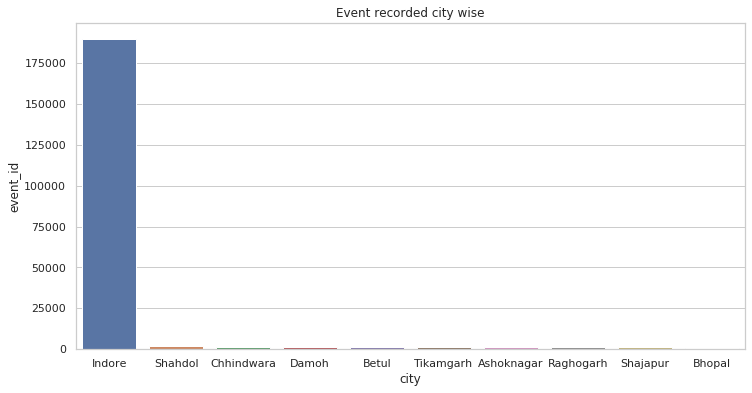

In [45]:
fig=plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.barplot(x='city',y='event_id',data=mp_top10_city_event)
plt.title('Event recorded city wise')
plt.show()

**Event logged date-wise**

In [46]:
mp_top5_date_event=df_events_mp.groupby('Date')['event_id'].count().nlargest(5)
mp_top5_date_event=mp_top5_date_event.reset_index()
mp_top5_date_event

,Date,event_id
0,2016-05-03,36099
1,2016-05-04,34425
2,2016-05-06,33919
3,2016-05-05,33132
4,2016-05-07,32548


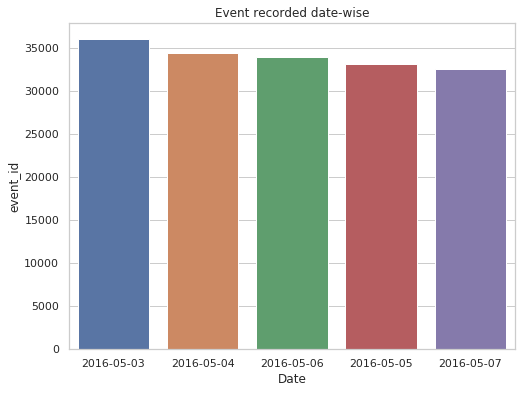

In [47]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Date',y='event_id',data=mp_top5_date_event)
plt.title('Event recorded date-wise')
plt.show()

**Event logged time-wise**

In [48]:
mp_top5_time_event=df_events_mp.groupby('Time')['event_id'].count().nlargest(5)
mp_top5_time_event=mp_top5_time_event.reset_index()
mp_top5_time_event

,Time,event_id
0,20:05:31,16
1,10:00:34,14
2,20:00:25,14
3,08:18:38,13
4,11:00:28,13


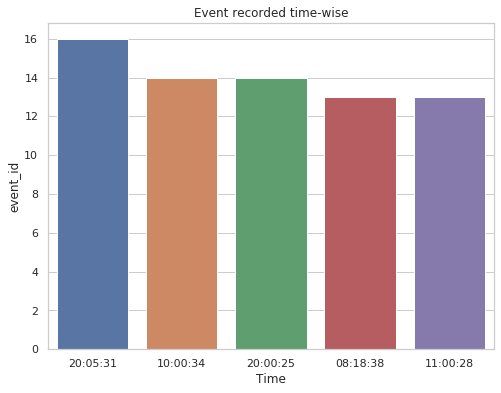

In [49]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Time',y='event_id',data=mp_top5_time_event)
plt.title('Event recorded time-wise')
plt.show()

**Event logged device wise**

In [50]:
mp_top5_device_event=df_events_mp.groupby('device_id')['event_id'].count().nlargest(5)
mp_top5_device_event=mp_top5_device_event.reset_index()
mp_top5_device_event


,device_id,event_id
0,3751556080923780612,1507
1,4113023436861671597,1157
2,-1752057305775059707,1084
3,-8790560034584248901,810
4,3738280493453802895,797


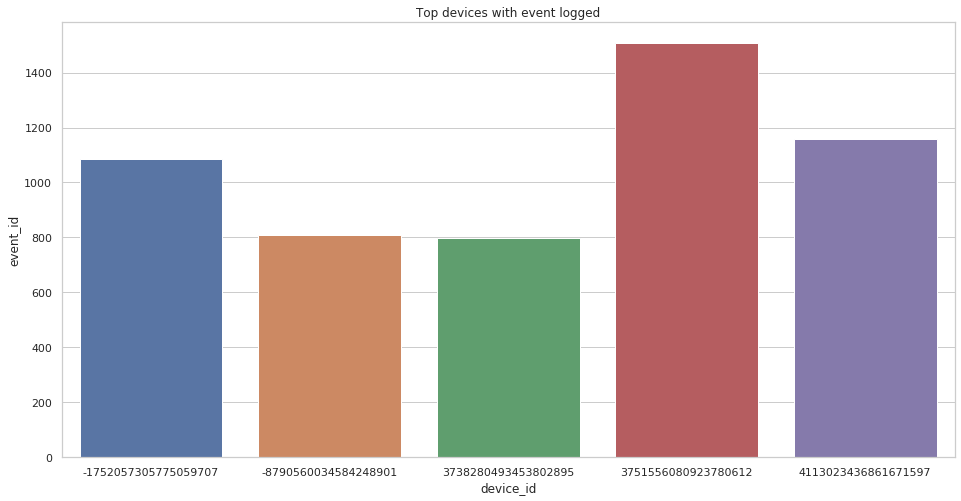

In [51]:
fig=plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x='device_id',y='event_id',data=mp_top5_device_event)
plt.title('Top devices with event logged')
plt.show()

- Total records - 232690

-  Data is for duration 2016, 30 April to 7 May , where May 3 and May 4 have recorded maximum event logging

- Data for 52 cities in Madhya Pradesh, and 189702 records belong to Indore city

- Unique device_id values - 3221

- Event_data dataset has NULL values for device_id,latitude and longitude-

  device_id    51

  longitude    63

  latitude     63

- device_id is empty for Indore city for date - 1 May 2016 - 7 May 2016

- longitude,latitude is empty for Indore city for date 30 Apr 2016 - 7 May 2016

- Also, device_id has type float which need to be converted to number, after resolving null values.

- Timestamp field can be converted to Date and time fields which can be used later if need to group by date values

In [52]:
#Getting data for Chattisgarh
df_events_cht=get_data(sqlcht)
df_events_cht.head()

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,21994,3170675365100452735,2016-05-04 19:44:31,81.647987,21.284864,Raipur,Chhattisgarh
1,60725,3170675365100452735,2016-05-02 22:02:20,81.647987,21.284864,Raipur,Chhattisgarh
2,64448,3170675365100452735,2016-05-05 01:08:34,81.647987,21.284864,Raipur,Chhattisgarh
3,65830,3170675365100452735,2016-05-04 00:50:31,81.647987,21.284864,Raipur,Chhattisgarh
4,70306,3170675365100452735,2016-05-07 00:33:50,81.647987,21.284864,Raipur,Chhattisgarh


In [53]:
df_events_cht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9754 entries, 0 to 9753
Data columns (total 7 columns):
event_id     9754 non-null int64
device_id    9754 non-null object
timestamp    9754 non-null datetime64[ns]
longitude    9754 non-null float64
latitude     9754 non-null float64
city         9754 non-null object
state        9754 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 533.5+ KB


In [54]:
df_events_cht.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [55]:
df_events_cht.shape

(9754, 7)

In [56]:
len(df_events_cht.device_id.unique())

400

In [57]:
len(df_events_cht.city.unique())

12

In [58]:
df_events_cht.groupby('city')['device_id'].count().nlargest(5)

city
Jagdalpur      1382
Bilaspur       1145
Rajnandgaon    1034
Bhilai          911
Durg            873
Name: device_id, dtype: int64

In [59]:
df_events_cht['Date']=df_events_cht.timestamp.dt.date
df_events_cht['Time']=df_events_cht.timestamp.dt.time
df_events_cht.drop('timestamp', axis=1, inplace=True)
df_events_cht.head()

,event_id,device_id,longitude,latitude,city,state,Date,Time
0,21994,3170675365100452735,81.647987,21.284864,Raipur,Chhattisgarh,2016-05-04,19:44:31
1,60725,3170675365100452735,81.647987,21.284864,Raipur,Chhattisgarh,2016-05-02,22:02:20
2,64448,3170675365100452735,81.647987,21.284864,Raipur,Chhattisgarh,2016-05-05,01:08:34
3,65830,3170675365100452735,81.647987,21.284864,Raipur,Chhattisgarh,2016-05-04,00:50:31
4,70306,3170675365100452735,81.647987,21.284864,Raipur,Chhattisgarh,2016-05-07,00:33:50


In [60]:
df_events_cht.groupby('device_id')['event_id'].count().nlargest(5)

device_id
130313677513796529     254
4072631279337923535    222
3170675365100452735    207
7437999276137431725    189
2676119753740865787    183
Name: event_id, dtype: int64

In [61]:
df_events_cht.Date.unique()

array([datetime.date(2016, 5, 4), datetime.date(2016, 5, 2),
       datetime.date(2016, 5, 5), datetime.date(2016, 5, 7),
       datetime.date(2016, 5, 6), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 1), datetime.date(2016, 4, 30)],
      dtype=object)

In [62]:
df_events_cht.groupby(['Date'])['event_id'].count().nlargest(5)

Date
2016-05-05    1560
2016-05-06    1518
2016-05-02    1417
2016-05-04    1368
2016-05-03    1336
Name: event_id, dtype: int64

In [63]:
state_cht_list=list(df_events_cht.city.unique())
state_cht_list

['Raipur',
 'Korba',
 'Raigarh',
 'Jagdalpur',
 'Bilaspur',
 'Bhilai',
 'Chirmiri',
 'Rajnandgaon',
 'Charoda',
 'Durg',
 'Ambikapur',
 'Dhamtari']

**Event logged city-wise**

In [64]:
cht_top10_city_event=df_events_cht.groupby('city')['event_id'].count().nlargest(10)
cht_top10_city_event=cht_top10_city_event.reset_index()
cht_top10_city_event

,city,event_id
0,Jagdalpur,1382
1,Bilaspur,1145
2,Rajnandgaon,1034
3,Bhilai,911
4,Durg,873
5,Korba,858
6,Chirmiri,816
7,Raipur,648
8,Charoda,645
9,Raigarh,577


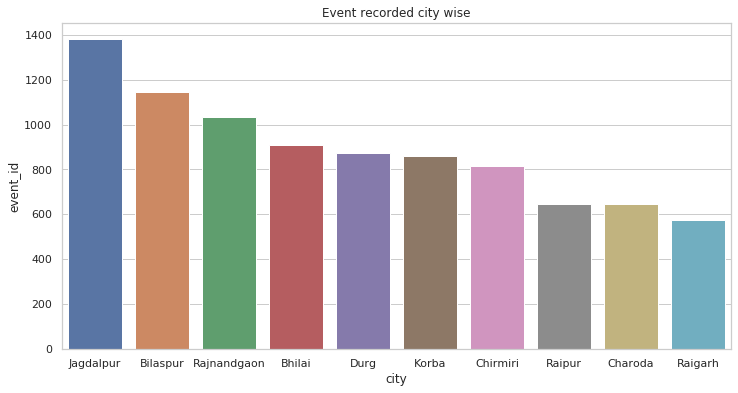

In [65]:
fig=plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.barplot(x='city',y='event_id',data=cht_top10_city_event)
plt.title('Event recorded city wise')
plt.show()

**Event logged date wise**

In [66]:
cht_top5_date_event=df_events_cht.groupby('Date')['event_id'].count().nlargest(5)
cht_top5_date_event=cht_top5_date_event.reset_index()
cht_top5_date_event

,Date,event_id
0,2016-05-05,1560
1,2016-05-06,1518
2,2016-05-02,1417
3,2016-05-04,1368
4,2016-05-03,1336


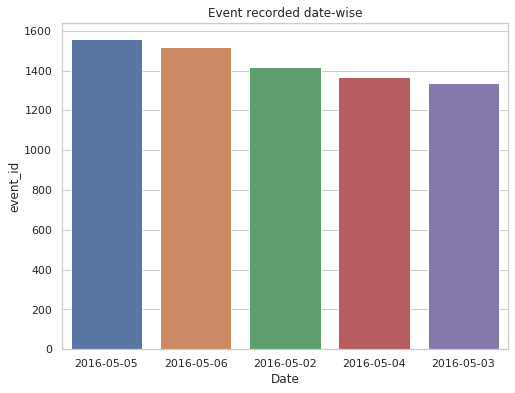

In [67]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Date',y='event_id',data=cht_top5_date_event)
plt.title('Event recorded date-wise')
plt.show()

**Event logged time wise**

In [68]:
cht_top5_time_event=df_events_cht.groupby('Time')['event_id'].count().nlargest(5)
cht_top5_time_event=cht_top5_time_event.reset_index()
cht_top5_time_event

,Time,event_id
0,03:43:52,5
1,03:45:22,5
2,03:44:52,4
3,19:23:38,4
4,20:07:36,4


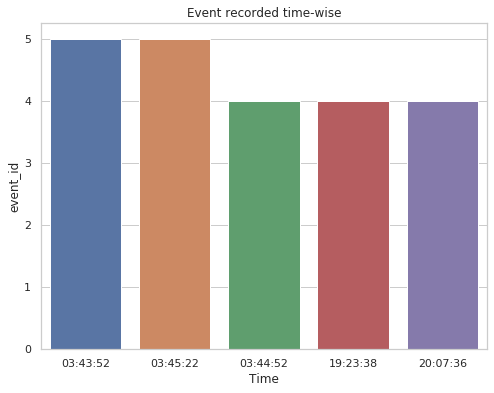

In [69]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Time',y='event_id',data=cht_top5_time_event)
plt.title('Event recorded time-wise')
plt.show()

**Event logged for device wise**

In [70]:
cht_top5_device_event=df_events_cht.groupby('device_id')['event_id'].count().nlargest(5)
cht_top5_device_event=cht_top5_device_event.reset_index()
cht_top5_device_event

,device_id,event_id
0,130313677513796529,254
1,4072631279337923535,222
2,3170675365100452735,207
3,7437999276137431725,189
4,2676119753740865787,183


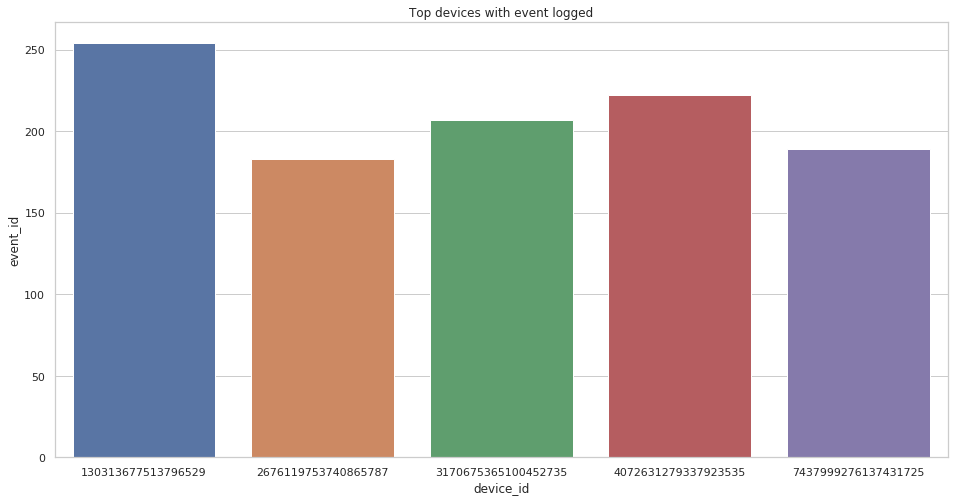

In [71]:
fig=plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x='device_id',y='event_id',data=cht_top5_device_event)
plt.title('Top devices with event logged')
plt.show()

- No null value
- Duration from 30 Apr to 7 May
- device_is is numeric
- 9754 records and 400 unique device_id
- Jagdalpur has highest count of records
- May 5 and May 6 have highest events recorded

In [72]:
#Getting data for Uttrakhand
df_events_utr=get_data(sqlutr)
df_events_utr.head()

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,21134,3256357565700008048,2016-05-07 18:39:49,80.266388,29.64415,Pithoragarh,Uttaranchal
1,66274,3256357565700008048,2016-05-07 00:14:05,80.266388,29.64415,Pithoragarh,Uttaranchal
2,89957,3256357565700008048,2016-05-02 10:35:29,80.266388,29.64415,Pithoragarh,Uttaranchal
3,104129,3256357565700008048,2016-05-06 15:38:15,80.266388,29.64415,Pithoragarh,Uttaranchal
4,165628,3256357565700008048,2016-05-06 06:17:42,80.266388,29.64415,Pithoragarh,Uttaranchal


In [73]:
df_events_utr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7720 entries, 0 to 7719
Data columns (total 7 columns):
event_id     7720 non-null int64
device_id    7720 non-null object
timestamp    7720 non-null datetime64[ns]
longitude    7720 non-null float64
latitude     7720 non-null float64
city         7720 non-null object
state        7720 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 422.3+ KB


In [74]:
df_events_utr.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [75]:
len(df_events_utr.device_id.unique())

258

In [77]:
df_events_utr.groupby('city')['device_id'].count().nlargest(5)

city
Kashipur              1711
Rurki                 1274
Haldwani              1135
DehraDun              1053
DehraDunCantonment     923
Name: device_id, dtype: int64

In [78]:
len(df_events_utr.city.unique())

8

In [79]:
df_events_utr['Date']=df_events_utr.timestamp.dt.date
df_events_utr['Time']=df_events_utr.timestamp.dt.time
df_events_utr.drop('timestamp', axis=1, inplace=True)
df_events_utr.head()

,event_id,device_id,longitude,latitude,city,state,Date,Time
0,21134,3256357565700008048,80.266388,29.64415,Pithoragarh,Uttaranchal,2016-05-07,18:39:49
1,66274,3256357565700008048,80.266388,29.64415,Pithoragarh,Uttaranchal,2016-05-07,00:14:05
2,89957,3256357565700008048,80.266388,29.64415,Pithoragarh,Uttaranchal,2016-05-02,10:35:29
3,104129,3256357565700008048,80.266388,29.64415,Pithoragarh,Uttaranchal,2016-05-06,15:38:15
4,165628,3256357565700008048,80.266388,29.64415,Pithoragarh,Uttaranchal,2016-05-06,06:17:42


In [80]:
df_events_utr.groupby('device_id')['event_id'].count().nlargest(5)

device_id
-41983044236764349      379
-5549211741297649718    226
-9110145231826192389    185
4850278293934252512     166
-2789140251647324465    158
Name: event_id, dtype: int64

In [81]:
df_events_utr.Date.unique()

array([datetime.date(2016, 5, 7), datetime.date(2016, 5, 2),
       datetime.date(2016, 5, 6), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 1), datetime.date(2016, 5, 5),
       datetime.date(2016, 5, 4), datetime.date(2016, 4, 30)],
      dtype=object)

In [82]:
df_events_utr.groupby(['Date'])['event_id'].count().nlargest(5)

Date
2016-05-01    1303
2016-05-03    1222
2016-05-06    1143
2016-05-02    1084
2016-05-05    1081
Name: event_id, dtype: int64

In [83]:
state_utr_list=list(df_events_utr.city.unique())
state_utr_list

['Pithoragarh',
 'Kashipur',
 'DehraDun',
 'Rurki',
 'DehraDunCantonment',
 'Haldwani',
 'Rishikesh',
 'Haridwar']

**Event logged city wise**

In [84]:
utr_top10_city_event=df_events_utr.groupby('city')['event_id'].count().nlargest(10)
utr_top10_city_event=utr_top10_city_event.reset_index()
utr_top10_city_event

,city,event_id
0,Kashipur,1711
1,Rurki,1274
2,Haldwani,1135
3,DehraDun,1053
4,DehraDunCantonment,923
5,Pithoragarh,697
6,Rishikesh,500
7,Haridwar,427


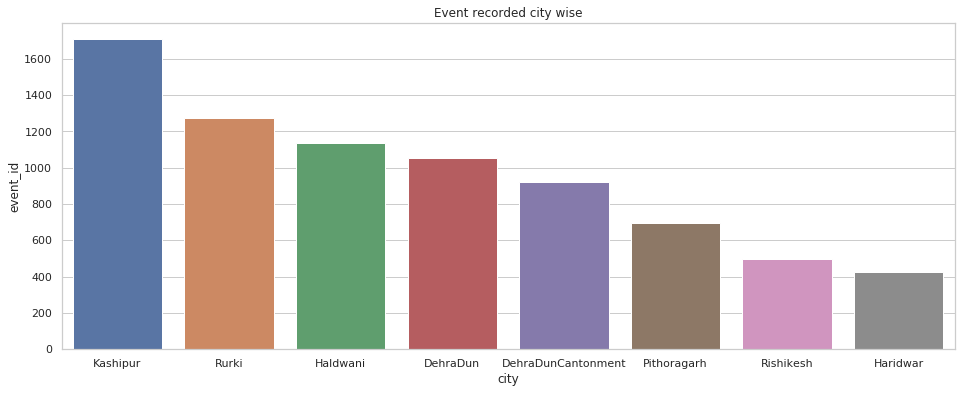

In [85]:
fig=plt.figure(figsize=(16,6))
sns.set(style="whitegrid")
sns.barplot(x='city',y='event_id',data=utr_top10_city_event)
plt.title('Event recorded city wise')
plt.show()

**Event logged date wise**

In [86]:
utr_top5_date_event=df_events_utr.groupby('Date')['event_id'].count().nlargest(5)
utr_top5_date_event=utr_top5_date_event.reset_index()
utr_top5_date_event


,Date,event_id
0,2016-05-01,1303
1,2016-05-03,1222
2,2016-05-06,1143
3,2016-05-02,1084
4,2016-05-05,1081


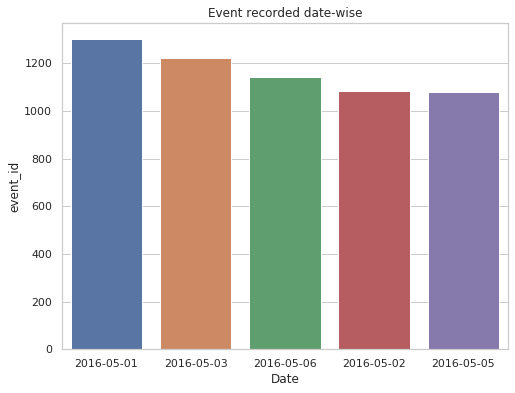

In [87]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Date',y='event_id',data=utr_top5_date_event)
plt.title('Event recorded date-wise')
plt.show()

**Event logged time wise**

In [88]:
utr_top5_time_event=df_events_utr.groupby('Time')['event_id'].count().nlargest(5)
utr_top5_time_event=utr_top5_time_event.reset_index()
utr_top5_time_event

,Time,event_id
0,06:44:57,6
1,08:54:10,6
2,08:54:40,5
3,05:19:11,4
4,08:55:40,4


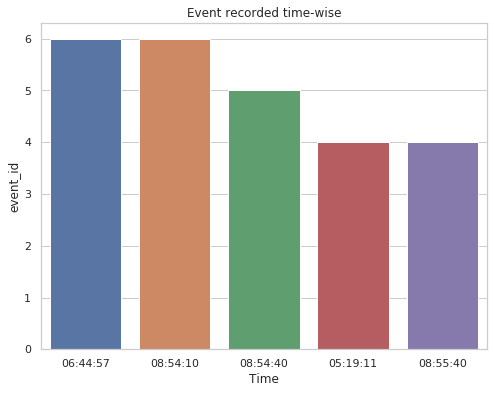

In [89]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Time',y='event_id',data=utr_top5_time_event)
plt.title('Event recorded time-wise')
plt.show()

**Event logged for devices**

In [90]:
utr_top5_device_event=df_events_utr.groupby('device_id')['event_id'].count().nlargest(5)
utr_top5_device_event=utr_top5_device_event.reset_index()
utr_top5_device_event

,device_id,event_id
0,-41983044236764349,379
1,-5549211741297649718,226
2,-9110145231826192389,185
3,4850278293934252512,166
4,-2789140251647324465,158


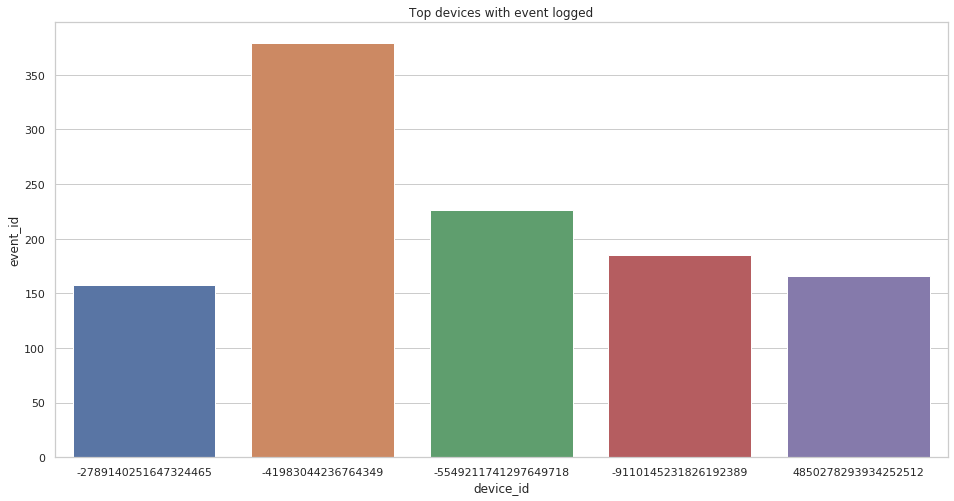

In [91]:
fig=plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x='device_id',y='event_id',data=utr_top5_device_event)
plt.title('Top devices with event logged')
plt.show()

- No NULL values
- Duration from 30 Apr to 7 May
- 7720 unique records with 258 unique device_id
- device_id is numeric
- kashipur has highest record count of 1711 out of 8 cities recorded
- May 1 and May 3 have highest event recorded

In [92]:
#Getting data for Jammu and Kashmir
df_events_jk=get_data(sqlujk)
df_events_jk.head()

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,21771,345465158970686742,2016-05-03 19:35:53,75.242622,33.808079,Anantnag,JammuandKashmir
1,23486,345465158970686742,2016-05-03 20:04:00,75.242622,33.808079,Anantnag,JammuandKashmir
2,23739,345465158970686742,2016-05-04 20:36:53,75.242622,33.808079,Anantnag,JammuandKashmir
3,23740,345465158970686742,2016-05-04 20:47:17,75.242622,33.808079,Anantnag,JammuandKashmir
4,44968,345465158970686742,2016-05-02 13:55:56,75.242622,33.808079,Anantnag,JammuandKashmir


In [93]:
df_events_jk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Data columns (total 7 columns):
event_id     5385 non-null int64
device_id    5385 non-null object
timestamp    5385 non-null datetime64[ns]
longitude    5385 non-null float64
latitude     5385 non-null float64
city         5385 non-null object
state        5385 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 294.6+ KB


In [94]:
df_events_jk.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [95]:
len(df_events_jk.device_id.unique())

236

In [96]:
len(df_events_jk.city.unique())

7

In [97]:
df_events_jk.groupby('city')['device_id'].count()

city
Anantnag    1103
Baramula     519
Jammu        771
Kathua       944
Sopur        961
Srinagar     342
Udhampur     745
Name: device_id, dtype: int64

In [98]:
df_events_jk['Date']=df_events_jk.timestamp.dt.date
df_events_jk['Time']=df_events_jk.timestamp.dt.time
df_events_jk.drop('timestamp', axis=1, inplace=True)
df_events_jk.head()

,event_id,device_id,longitude,latitude,city,state,Date,Time
0,21771,345465158970686742,75.242622,33.808079,Anantnag,JammuandKashmir,2016-05-03,19:35:53
1,23486,345465158970686742,75.242622,33.808079,Anantnag,JammuandKashmir,2016-05-03,20:04:00
2,23739,345465158970686742,75.242622,33.808079,Anantnag,JammuandKashmir,2016-05-04,20:36:53
3,23740,345465158970686742,75.242622,33.808079,Anantnag,JammuandKashmir,2016-05-04,20:47:17
4,44968,345465158970686742,75.242622,33.808079,Anantnag,JammuandKashmir,2016-05-02,13:55:56


In [100]:
df_events_jk.groupby('device_id')['event_id'].count().nlargest(5)

device_id
345465158970686742      251
7045916471353937770     215
8000587822583931579     195
-8012124697011514314    137
2855490627196675509     111
Name: event_id, dtype: int64

In [101]:
df_events_jk.Date.unique()

array([datetime.date(2016, 5, 3), datetime.date(2016, 5, 4),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 5),
       datetime.date(2016, 5, 6), datetime.date(2016, 5, 1),
       datetime.date(2016, 5, 7)], dtype=object)

In [102]:
df_events_jk.groupby(['Date'])['event_id'].count().nlargest(5)

Date
2016-05-02    827
2016-05-01    812
2016-05-04    810
2016-05-06    808
2016-05-03    771
Name: event_id, dtype: int64

In [103]:
state_jk_list=list(df_events_jk.city.unique())
state_jk_list

['Anantnag', 'Kathua', 'Jammu', 'Sopur', 'Udhampur', 'Baramula', 'Srinagar']

**Event logged city wise**

In [104]:
jk_top10_city_event=df_events_jk.groupby('city')['event_id'].count().nlargest(10)
jk_top10_city_event=jk_top10_city_event.reset_index()
jk_top10_city_event

,city,event_id
0,Anantnag,1103
1,Sopur,961
2,Kathua,944
3,Jammu,771
4,Udhampur,745
5,Baramula,519
6,Srinagar,342


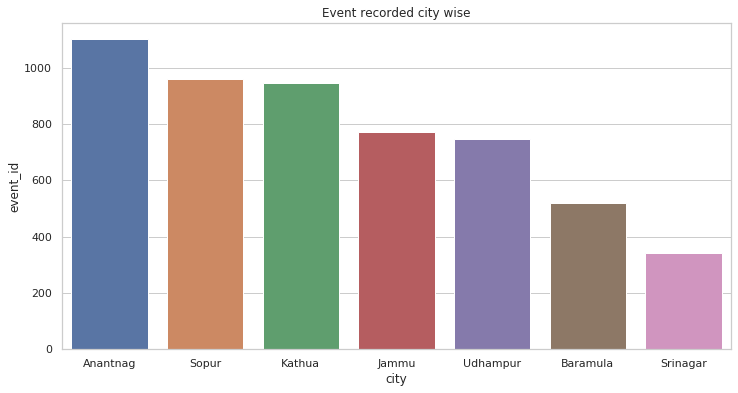

In [105]:
fig=plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.barplot(x='city',y='event_id',data=jk_top10_city_event)
plt.title('Event recorded city wise')
plt.show()

**Event logged date wise**

In [106]:
jk_top5_date_event=df_events_jk.groupby('Date')['event_id'].count().nlargest(5)
jk_top5_date_event=jk_top5_date_event.reset_index()
jk_top5_date_event

,Date,event_id
0,2016-05-02,827
1,2016-05-01,812
2,2016-05-04,810
3,2016-05-06,808
4,2016-05-03,771


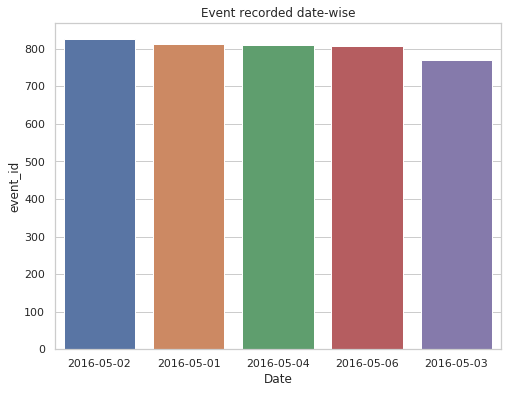

In [107]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Date',y='event_id',data=jk_top5_date_event)
plt.title('Event recorded date-wise')
plt.show()

**Event logged time wise**

In [108]:
jk_top5_time_event=df_events_jk.groupby('Time')['event_id'].count().nlargest(5)
jk_top5_time_event=jk_top5_time_event.reset_index()
jk_top5_time_event

,Time,event_id
0,04:22:33,6
1,04:22:03,5
2,04:21:33,4
3,04:23:03,3
4,04:23:33,3


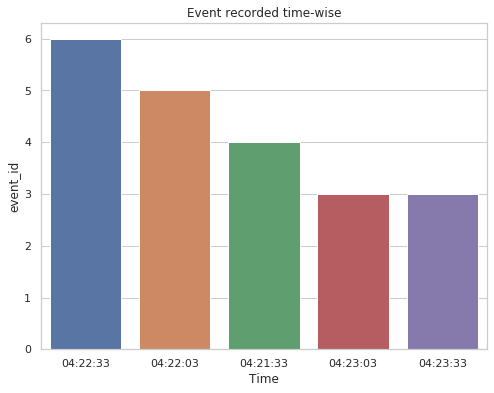

In [109]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Time',y='event_id',data=jk_top5_time_event)
plt.title('Event recorded time-wise')
plt.show()

**Event logged for devices**

In [110]:
jk_top5_device_event=df_events_mp.groupby('device_id')['event_id'].count().nlargest(5)
jk_top5_device_event=jk_top5_device_event.reset_index()
jk_top5_device_event

,device_id,event_id
0,3751556080923780612,1507
1,4113023436861671597,1157
2,-1752057305775059707,1084
3,-8790560034584248901,810
4,3738280493453802895,797


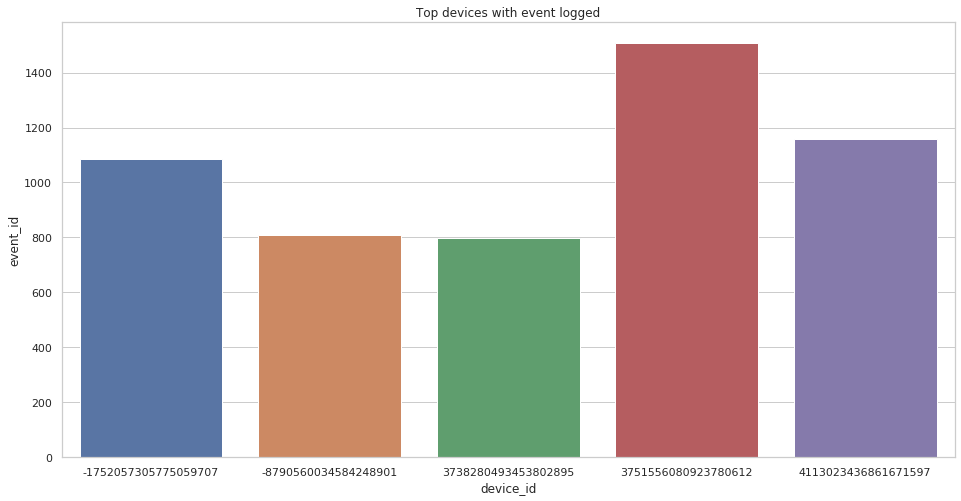

In [111]:
fig=plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x='device_id',y='event_id',data=jk_top5_device_event)
plt.title('Top devices with event logged')
plt.show()

- No NULL values
- Duration from 1 May to 7 May
- 5385 records with 236 unique values
- Anantnag has maximum count of records from 7 cities
- device_id is numeric
- May 2 and May 3 have  highest event recorded

In [112]:
#Getting data for Goa
df_events_goa=get_data(sqlgoa)
df_events_goa.head()

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,20984,-6751207669980900563,2016-05-06 18:23:03,73.973602,15.317287,Madgaon,Goa
1,33979,-6751207669980900563,2016-05-04 06:02:36,73.973602,15.317287,Madgaon,Goa
2,104768,-6751207669980900563,2016-05-07 15:11:31,73.973602,15.317287,Madgaon,Goa
3,135615,-6751207669980900563,2016-05-07 15:10:31,73.973602,15.317287,Madgaon,Goa
4,420749,-6751207669980900563,2016-05-07 15:12:39,73.973602,15.317287,Madgaon,Goa


In [113]:
df_events_goa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 7 columns):
event_id     3250 non-null int64
device_id    3250 non-null object
timestamp    3250 non-null datetime64[ns]
longitude    3250 non-null float64
latitude     3250 non-null float64
city         3250 non-null object
state        3250 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 177.9+ KB


In [114]:
df_events_goa.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [115]:
len(df_events_goa.device_id.unique())

76

In [116]:
len(df_events_goa.city.unique())

3

In [117]:
df_events_goa.groupby('city')['device_id'].count().nlargest(5)

city
Mormugao    2352
Madgaon      497
Panaji       401
Name: device_id, dtype: int64

In [118]:
df_events_goa.groupby('device_id')['event_id'].count().nlargest(5)

device_id
3992361992277142040     448
5388499639796252565     325
-4374356101743562672    240
-8273701417712267743    233
-21898461299279926      172
Name: event_id, dtype: int64

In [119]:
df_events_goa['Date']=df_events_goa.timestamp.dt.date
df_events_goa['Time']=df_events_goa.timestamp.dt.time
df_events_goa.drop('timestamp', axis=1, inplace=True)
df_events_goa.head()

,event_id,device_id,longitude,latitude,city,state,Date,Time
0,20984,-6751207669980900563,73.973602,15.317287,Madgaon,Goa,2016-05-06,18:23:03
1,33979,-6751207669980900563,73.973602,15.317287,Madgaon,Goa,2016-05-04,06:02:36
2,104768,-6751207669980900563,73.973602,15.317287,Madgaon,Goa,2016-05-07,15:11:31
3,135615,-6751207669980900563,73.973602,15.317287,Madgaon,Goa,2016-05-07,15:10:31
4,420749,-6751207669980900563,73.973602,15.317287,Madgaon,Goa,2016-05-07,15:12:39


In [120]:
df_events_goa.Date.unique()

array([datetime.date(2016, 5, 6), datetime.date(2016, 5, 4),
       datetime.date(2016, 5, 7), datetime.date(2016, 5, 2),
       datetime.date(2016, 5, 5), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 1), datetime.date(2016, 4, 30)],
      dtype=object)

In [121]:
df_events_goa.groupby(['Date'])['event_id'].count().nlargest(5)

Date
2016-05-02    505
2016-05-04    495
2016-05-01    486
2016-05-05    458
2016-05-03    446
Name: event_id, dtype: int64

In [122]:
states_goa_list=list(df_events_goa.city.unique())
states_goa_list

['Madgaon', 'Mormugao', 'Panaji']

**Event recorded city wise**

In [123]:
goa_top10_city_event=df_events_goa.groupby('city')['event_id'].count().nlargest(10)
goa_top10_city_event=goa_top10_city_event.reset_index()
goa_top10_city_event

,city,event_id
0,Mormugao,2352
1,Madgaon,497
2,Panaji,401


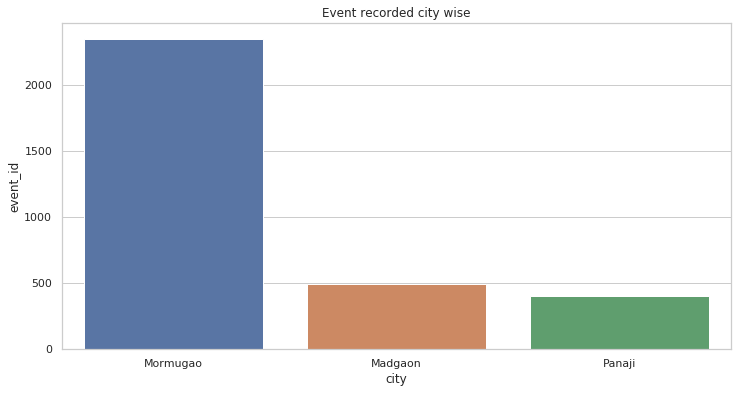

In [124]:
fig=plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.barplot(x='city',y='event_id',data=goa_top10_city_event)
plt.title('Event recorded city wise')
plt.show()

**Event recorded date wise**

In [125]:
goa_top5_date_event=df_events_goa.groupby('Date')['event_id'].count().nlargest(5)
goa_top5_date_event=goa_top5_date_event.reset_index()
goa_top5_date_event

,Date,event_id
0,2016-05-02,505
1,2016-05-04,495
2,2016-05-01,486
3,2016-05-05,458
4,2016-05-03,446


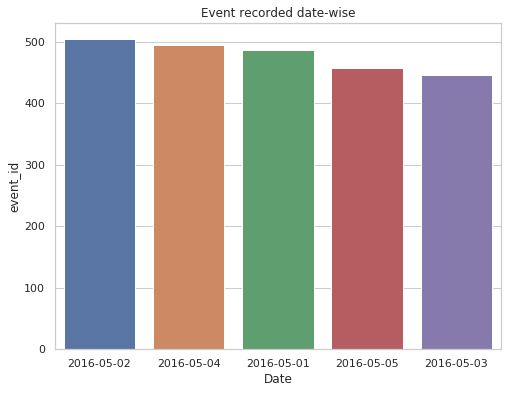

In [126]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Date',y='event_id',data=goa_top5_date_event)
plt.title('Event recorded date-wise')
plt.show()

**Event recorded time wise**

In [127]:
goa_top5_time_event=df_events_goa.groupby('Time')['event_id'].count().nlargest(5)
goa_top5_time_event=goa_top5_time_event.reset_index()
goa_top5_time_event

,Time,event_id
0,00:05:30,5
1,00:06:00,5
2,00:06:30,4
3,00:04:30,3
4,00:04:31,3


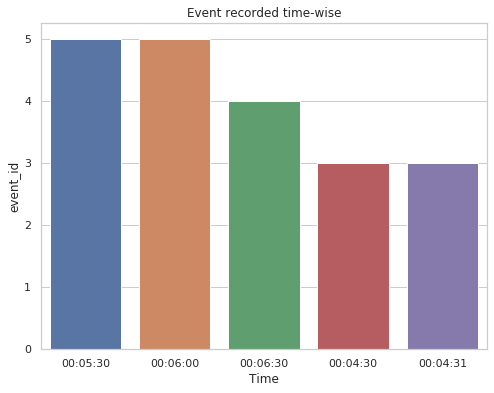

In [128]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Time',y='event_id',data=goa_top5_time_event)
plt.title('Event recorded time-wise')
plt.show()

**Event recorded for devices**

In [129]:
goa_top5_device_event=df_events_goa.groupby('device_id')['event_id'].count().nlargest(5)
goa_top5_device_event=goa_top5_device_event.reset_index()
goa_top5_device_event

,device_id,event_id
0,3992361992277142040,448
1,5388499639796252565,325
2,-4374356101743562672,240
3,-8273701417712267743,233
4,-21898461299279926,172


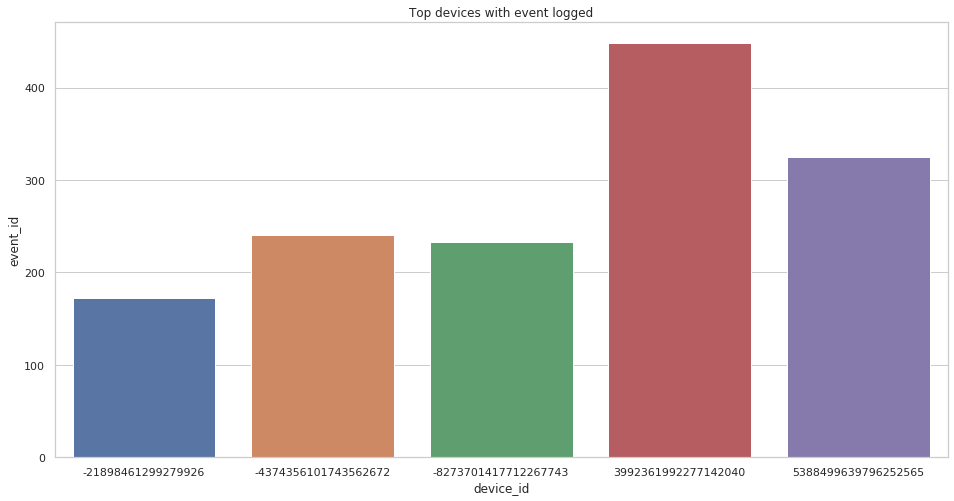

In [130]:
fig=plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x='device_id',y='event_id',data=goa_top5_device_event)
plt.title('Top devices with event logged')
plt.show()

- No NULL values
- Duration from 30 Apr 2016 to 7 May 2016
- May 2 and May 4 have highest recorded event
- 3250 records with 76 unique device_id
- device_id is numeric
- data for 3 cities with Mormugao has highest record count - 2352

In [131]:
#Getting data for Nagaland
df_events_nag=get_data(sqlnag)
df_events_nag.head()

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


,event_id,device_id,timestamp,longitude,latitude,city,state
0,22093,9132041579920627992,2016-05-04 19:03:15,94.354393,26.183962,Wokha,Nagaland
1,22794,9132041579920627992,2016-05-07 19:37:42,94.354393,26.183962,Wokha,Nagaland
2,55519,9132041579920627992,2016-05-05 19:22:27,94.354393,26.183962,Wokha,Nagaland
3,55692,9132041579920627992,2016-05-05 19:17:15,94.354393,26.183962,Wokha,Nagaland
4,102376,9132041579920627992,2016-05-04 19:01:14,94.354393,26.183962,Wokha,Nagaland


In [132]:
df_events_nag['Date']=df_events_nag.timestamp.dt.date
df_events_nag['Time']=df_events_nag.timestamp.dt.time
df_events_nag.drop('timestamp', axis=1, inplace=True)
df_events_nag.head()

,event_id,device_id,longitude,latitude,city,state,Date,Time
0,22093,9132041579920627992,94.354393,26.183962,Wokha,Nagaland,2016-05-04,19:03:15
1,22794,9132041579920627992,94.354393,26.183962,Wokha,Nagaland,2016-05-07,19:37:42
2,55519,9132041579920627992,94.354393,26.183962,Wokha,Nagaland,2016-05-05,19:22:27
3,55692,9132041579920627992,94.354393,26.183962,Wokha,Nagaland,2016-05-05,19:17:15
4,102376,9132041579920627992,94.354393,26.183962,Wokha,Nagaland,2016-05-04,19:01:14


In [133]:
df_events_nag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 8 columns):
event_id     2298 non-null int64
device_id    2298 non-null object
longitude    2298 non-null float64
latitude     2298 non-null float64
city         2298 non-null object
state        2298 non-null object
Date         2298 non-null object
Time         2298 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 143.8+ KB


In [134]:
df_events_nag.isnull().sum()

event_id     0
device_id    0
longitude    0
latitude     0
city         0
state        0
Date         0
Time         0
dtype: int64

In [135]:
len(df_events_nag.device_id.unique())

107

In [136]:
len(df_events_nag.city.unique())

3

In [137]:
df_events_nag.groupby('city')['device_id'].count().nlargest(3)

city
Wokha      1100
Kohima      614
Dimapur     584
Name: device_id, dtype: int64

In [138]:
df_events_nag.groupby('device_id')['event_id'].count().nlargest(3)

device_id
9132041579920627992     244
5213783467221875757     183
-5696849591913476710    152
Name: event_id, dtype: int64

In [139]:
df_events_nag.Date.unique()

array([datetime.date(2016, 5, 4), datetime.date(2016, 5, 7),
       datetime.date(2016, 5, 5), datetime.date(2016, 5, 6),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 1),
       datetime.date(2016, 5, 3)], dtype=object)

In [140]:
df_events_nag.groupby(['Date'])['event_id'].count().nlargest(5)

Date
2016-05-07    369
2016-05-05    366
2016-05-06    362
2016-05-01    361
2016-05-04    357
Name: event_id, dtype: int64

In [141]:
states_ng_list=list(df_events_nag.city.unique())
states_ng_list

['Wokha', 'Dimapur', 'Kohima']

**Event recorded city wise**

In [142]:
ng_top10_city_event=df_events_nag.groupby('city')['event_id'].count().nlargest(10)
ng_top10_city_event=ng_top10_city_event.reset_index()
ng_top10_city_event

,city,event_id
0,Wokha,1100
1,Kohima,614
2,Dimapur,584


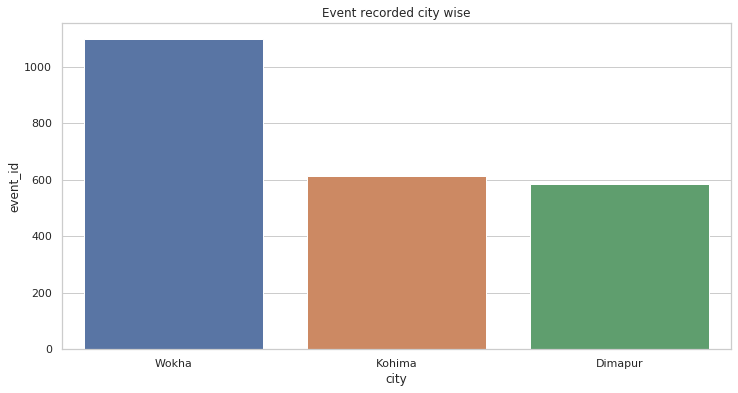

In [143]:
fig=plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.barplot(x='city',y='event_id',data=ng_top10_city_event)
plt.title('Event recorded city wise')
plt.show()

**Event recorded date wise**

In [144]:
ng_top5_date_event=df_events_nag.groupby('Date')['event_id'].count().nlargest(5)
ng_top5_date_event=ng_top5_date_event.reset_index()
ng_top5_date_event

,Date,event_id
0,2016-05-07,369
1,2016-05-05,366
2,2016-05-06,362
3,2016-05-01,361
4,2016-05-04,357


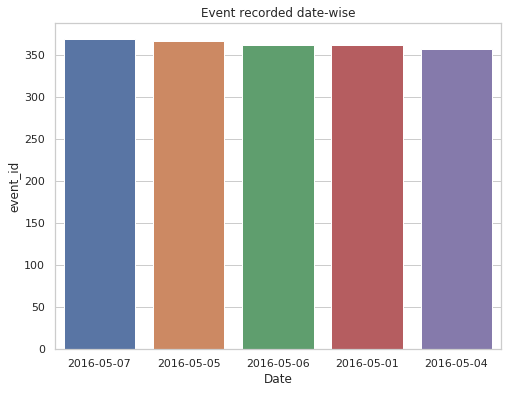

In [145]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Date',y='event_id',data=ng_top5_date_event)
plt.title('Event recorded date-wise')
plt.show()

**Event recorded time wise**

In [146]:
ng_top5_time_event=df_events_nag.groupby('Time')['event_id'].count().nlargest(5)
ng_top5_time_event=ng_top5_time_event.reset_index()
ng_top5_time_event

,Time,event_id
0,18:20:11,8
1,21:27:43,5
2,21:28:13,5
3,21:28:43,5
4,21:29:13,5


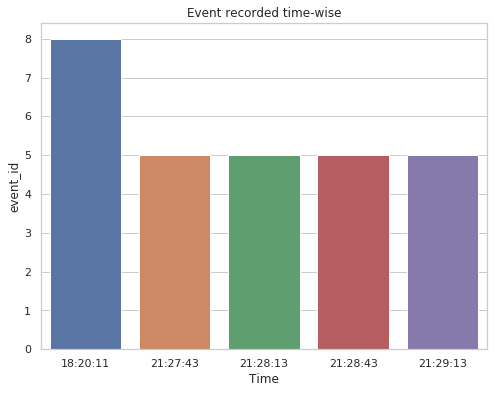

In [147]:
fig=plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='Time',y='event_id',data=ng_top5_time_event)
plt.title('Event recorded time-wise')
plt.show()

**Event recorded for devices**

In [148]:
ng_top5_device_event=df_events_nag.groupby('device_id')['event_id'].count().nlargest(5)
ng_top5_device_event=ng_top5_device_event.reset_index()
ng_top5_device_event

,device_id,event_id
0,9132041579920627992,244
1,5213783467221875757,183
2,-5696849591913476710,152
3,2243613946498943264,147
4,7011237962868114666,86


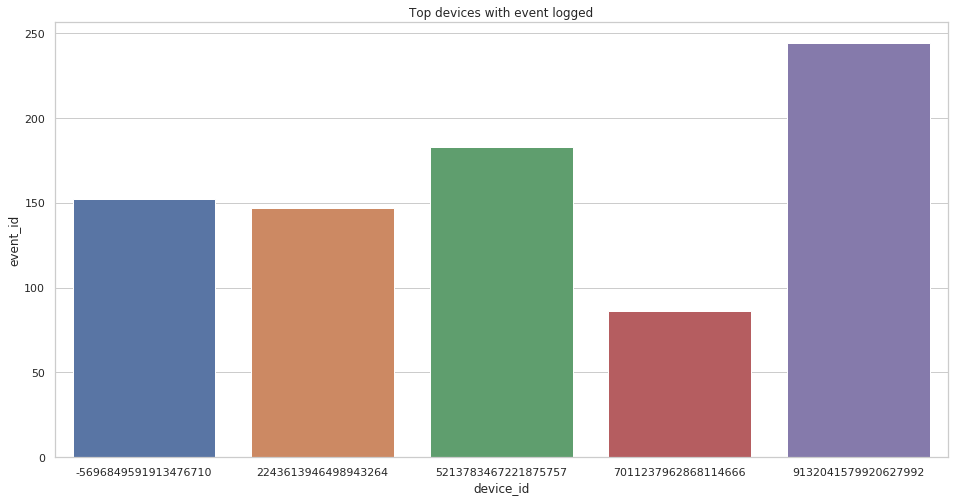

In [149]:
fig=plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
sns.barplot(x='device_id',y='event_id',data=ng_top5_device_event)
plt.title('Top devices with event logged')
plt.show()

- No NULL values
- 2298 records with 107 unique device_id
- Wokha has highest count out of 3 cities recorded.
- Duration from May 1 to May 7 2016
- May 7 and May 5 have highest event recorded

**Madhya Pradesh**

- state_mp_list
- mp_top10_city_event
- mp_top5_date_event
- mp_top5_time_event
- mp_top5_device_event


**Chattisgarh**
- state_cht_list
- cht_top10_city_event
- cht_top5_date_event
- cht_top5_time_event
- cht_top5_device_event

**Uttrakhand**
- state_utr_list
- utr_top10_city_event
- utr_top5_date_event
- utr_top5_time_event
- utr_top5_device_event


**Jammu and Kashmir**
- state_jk_list
- jk_top10_city_event
- jk_top5_date_event
- jk_top5_time_event
- jk_top5_device_event


**Goa**
- states_goa_list
- goa_top10_city_event
- goa_top5_date_event
- goa_top5_time_event
- goa_top5_device_event


**Nagaland**
- states_ng_list
- ng_top10_city_event
- ng_top5_date_event
- ng_top5_time_event
- ng_top5_device_event




**Plotting event and  device_id values in event_data dataset**

In [162]:
#Madhya Pradesh
#((df_events_mp[df_events_mp.device_id.str.contains("-")].count()/df_events_mp[df_events_mp.device_id.notnull()].count())*100)[0]
#(len(df_events_mp[df_events_mp.device_id.str.contains("-")]['device_id'].unique())/len(df_events_mp.device_id.unique()))*10
mp_event_count=df_events_mp.event_id.count()
mp_device_count=len(df_events_mp.device_id.unique())
mp_negdevice_count=len(df_events_mp[df_events_mp.device_id.str.contains("-")]['device_id'].unique())
print(mp_event_count, mp_device_count, mp_negdevice_count)

232690 3220 1672


In [163]:
#Chattisgarh
#((df_events_cht[df_events_cht.device_id.str.contains("-")].count()/df_events_cht[df_events_cht.device_id.notnull()].count())*100)[0]
#(len(df_events_cht[df_events_cht.device_id.str.contains("-")]['device_id'].unique())/len(df_events_cht.device_id.unique()))*100
cht_event_count=df_events_cht.event_id.count()
cht_device_count=len(df_events_cht.device_id.unique())
cht_negdevice_count=len(df_events_cht[df_events_cht.device_id.str.contains("-")]['device_id'].unique())
print(cht_event_count, cht_device_count, cht_negdevice_count)

9754 400 211


In [164]:
#Uttrakahnd
#((df_events_utr[df_events_utr.device_id.str.contains("-")].count()/df_events_utr[df_events_utr.device_id.notnull()].count())*100)[0]
#(len(df_events_utr[df_events_utr.device_id.str.contains("-")]['device_id'].unique())/len(df_events_utr.device_id.unique()))*100
utr_event_count=df_events_utr.event_id.count()
utr_device_count=len(df_events_utr.device_id.unique())
utr_negdevice_count=len(df_events_utr[df_events_utr.device_id.str.contains("-")]['device_id'].unique())
print(utr_event_count, utr_device_count, utr_negdevice_count)

7720 258 125


In [165]:
#Jammu and Kashmir
#((df_events_jk[df_events_jk.device_id.str.contains("-")].count()/df_events_jk[df_events_jk.device_id.notnull()].count())*100)[0]
#(len(df_events_jk[df_events_jk.device_id.str.contains("-")]['device_id'].unique())/len(df_events_jk.device_id.unique()))*100
jk_event_count=df_events_jk.event_id.count()
jk_device_count=len(df_events_jk.device_id.unique())
jk_negdevice_count=len(df_events_jk[df_events_jk.device_id.str.contains("-")]['device_id'].unique())
print(jk_event_count, jk_device_count, jk_negdevice_count)

5385 236 120


In [167]:
#Goa
#(df_events_goa[df_events_goa.device_id.str.contains("-")].count()/df_events_goa[df_events_goa.device_id.notnull()].count())*100
#(len(df_events_goa[df_events_goa.device_id.str.contains("-")]['device_id'].unique())/len(df_events_goa.device_id.unique()))*100
goa_event_count=df_events_goa.event_id.count()
goa_device_count=len(df_events_goa.device_id.unique())
goa_negdevice_count=len(df_events_goa[df_events_goa.device_id.str.contains("-")]['device_id'].unique())
print(goa_event_count, goa_device_count, goa_negdevice_count)

3250 76 44


In [168]:
#Nagaland
#(df_events_nag[df_events_nag.device_id.str.contains("-")].count()/df_events_nag[df_events_nag.device_id.notnull()].count())*100
#(len(df_events_nag[df_events_nag.device_id.str.contains("-")]['device_id'].unique())/len(df_events_nag.device_id.unique()))*100
nag_event_count=df_events_nag.event_id.count()
nag_device_count=len(df_events_nag.device_id.unique())
nag_negdevice_count=len(df_events_nag[df_events_nag.device_id.str.contains("-")]['device_id'].unique())
print(nag_event_count, nag_device_count, nag_negdevice_count)

2298 107 50


In [169]:
print (len(state_mp_list))
print (len(state_cht_list))
print (len(state_utr_list))
print (len(state_jk_list))
print (len(states_goa_list))
print (len(states_ng_list))

52
12
8
7
3
3


In [183]:
event_plot_df=pd.DataFrame({'City count':[len(state_mp_list),len(state_cht_list),len(state_utr_list),len(state_jk_list),len(states_goa_list),len(states_ng_list)],
                #'Event count':[mp_event_count,cht_event_count,utr_event_count,jk_event_count,goa_event_count,nag_event_count],
                'Device count':[mp_device_count,cht_device_count,utr_device_count,jk_device_count,goa_device_count,nag_device_count],
                'Neg device count':[mp_negdevice_count,cht_negdevice_count,utr_negdevice_count,jk_negdevice_count,goa_negdevice_count,nag_negdevice_count]},
                index=['Madhya Pradesh','Chattisgarh','Uttrakhand','Jammu and Kashmir', 'Goa', 'Nagaland'])
event_plot_df

,City count,Device count,Neg device count
Madhya Pradesh,52,3220,1672
Chattisgarh,12,400,211
Uttrakhand,8,258,125
Jammu and Kashmir,7,236,120
Goa,3,76,44
Nagaland,3,107,50


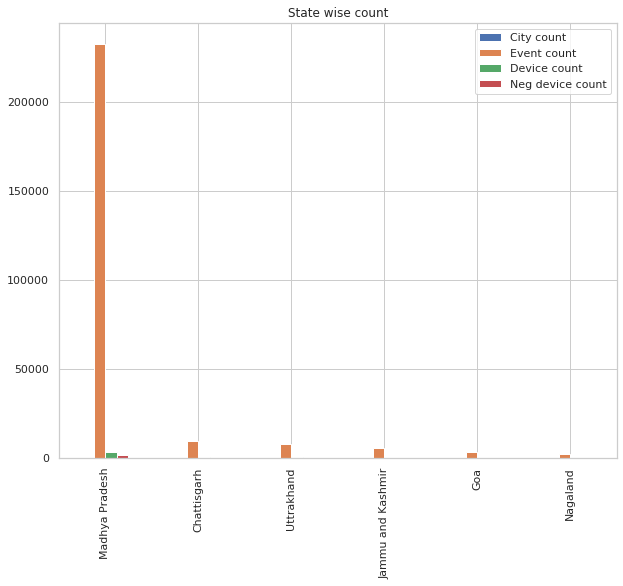

In [298]:
#fig=plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize']=(10,8)
event_plot_df.plot.bar()
plt.title("State wise count")
plt.legend()
plt.show()

In [188]:
event_plot_df=pd.DataFrame({'City count':[len(state_mp_list),len(state_cht_list),len(state_utr_list),len(state_jk_list),len(states_goa_list),len(states_ng_list)],
                'Event count':[mp_event_count,cht_event_count,utr_event_count,jk_event_count,goa_event_count,nag_event_count],
                'Device count':[mp_device_count,cht_device_count,utr_device_count,jk_device_count,goa_device_count,nag_device_count],
                'Neg device count':[mp_negdevice_count,cht_negdevice_count,utr_negdevice_count,jk_negdevice_count,goa_negdevice_count,nag_negdevice_count]},
                index=['Madhya Pradesh','Chattisgarh','Uttrakhand','Jammu and Kashmir', 'Goa', 'Nagaland'])
event_plot_df

,City count,Event count,Device count,Neg device count
Madhya Pradesh,52,232690,3220,1672
Chattisgarh,12,9754,400,211
Uttrakhand,8,7720,258,125
Jammu and Kashmir,7,5385,236,120
Goa,3,3250,76,44
Nagaland,3,2298,107,50


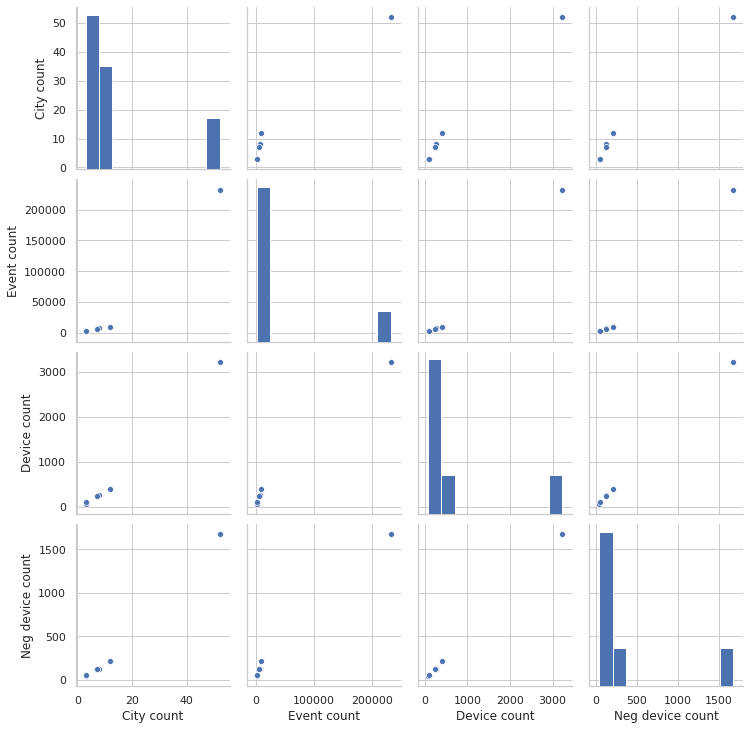

In [190]:
sns.pairplot(data=event_plot_df)


**Combined observation on event_data dataset**


**Madhya Pradesh**
- Total records - 232690
- Data is for duration 2016, 30 April to 7 May , where May 3 and May 4 have recorded maximum event logging
- Data for 52 cities in Madhya Pradesh, and 189702 records belong to Indore city
- Unique device_id values - 3221
- Event_data dataset has NULL values for device_id,latitude and longitude-

  device_id    51

  longitude    63

  latitude     63

- device_id is empty for Indore city for date - 1 May 2016 - 7 May 2016
- longitude,latitude is empty for Indore city for date 30 Apr 2016 - 7 May 2016
- Also, device_id has type float which need to be converted to number, after resolving null values.
- Timestamp field can be converted to Date and time fields which can be used later if need to group by date values
- Madhya Pradesh has 50.39% of records with -ve device_ids whereas -ve device_id count is 51.90%
- Madhya Pradesh Dataset has float64 type for device_id values whereas it is numeric for other states is becaus of NaN value, default type of NaN is float64 which makes the entire column as float64 in case of any missing value


**Chattisgarh**
- No null value
- Duration from 30 Apr to 7 May
- May 5 and May 6 have highest events recorded
- device_is is numeric
- 9754 records and 400 unique device_id
- Jagdalpur has highest count of records
- Chattisgarh has 43.68% of records with -ve device_ids whereas -ve device_id count is 52.75%


**Uttrakhand**
- No NULL values
- Duration from 30 Apr to 7 May
- May 1 and May 3 have highest event recorded
- 7720 unique records with 258 unique device_id
- device_id is numeric
- kashipur has highest record count of 1711 out of 8 cities recorded
- Uttrakhand has 47.40% of records with -ve device_ids whereas -ve device_id count is 48.44%


**Jammu and Kashmir**
- No NULL values
- Duration from 1 May to 7 May
- 5385 records with 236 unique values
- Anantnag has maximum count of records from 7 cities
- device_id is numeric
- Jammu and Kashmir has 41.80% records with -ve device_id where -ve device_id count is 50.85%
- May 2 and May 3 have  highest event recorded


**Goa**
- No NULL values
- Duration from 30 Apr 2016 to 7 May 2016
- May 2 and May 4 have highest recorded event
- 3250 records with 76 unique device_id
- device_id is numeric
- data for 3 cities with Mormugao has highest record count - 2352
- Goa has 43.53% records with -ve device_id where -ve device_id count is 57.89%


**Nagaland**
- No NULL values
- 2298 records with 107 unique device_id
- Wokha has highest count out of 3 cities recorded.
- Nagaland has 32.85% of records with -ve device_id whereas -ve device_id count is 46.72%
- Duration from May 1 to May 7 2016
- May 7 and May 5 have highest event recorded

In [191]:
df_event_data=pd.concat([df_events_mp,df_events_cht,df_events_utr,df_events_jk,df_events_goa,df_events_nag])
df_event_data.head()

,event_id,device_id,longitude,latitude,city,state,Date,Time
0,10117,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-01,11:11:24
1,112369,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-04,22:47:19
2,139098,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-01,09:55:58
3,190983,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-04,22:51:03
4,249507,-5323073305882503557,75.939545,22.769171,Indore,MadhyaPradesh,2016-05-01,11:24:12


In [196]:
df_event_data.tail()

,event_id,device_id,longitude,latitude,city,state,Date,Time
2293,2642178,8947047326762854730,93.797226,26.013659,Dimapur,Nagaland,2016-05-06,08:48:52
2294,2644640,7738513754769838106,94.154037,25.760735,Kohima,Nagaland,2016-05-01,09:20:55
2295,2872267,-4885109984403117505,94.134407,25.688953,Kohima,Nagaland,2016-05-03,07:11:19
2296,2891941,-4366861445494057735,94.180641,25.720957,Kohima,Nagaland,2016-05-02,22:36:14
2297,3246861,3633748193818518324,94.126144,25.685511,Kohima,Nagaland,2016-05-04,20:40:35


In [197]:
device_id_list_event=list(df_event_data.device_id.unique())
device_id_list_event[0:5]


['-5323073305882503557',
 '7580036394434457107',
 '4264375166000459933',
 '3931591435720953390',
 '-4477353898751756798']

In [198]:
len(device_id_list_event)

4297

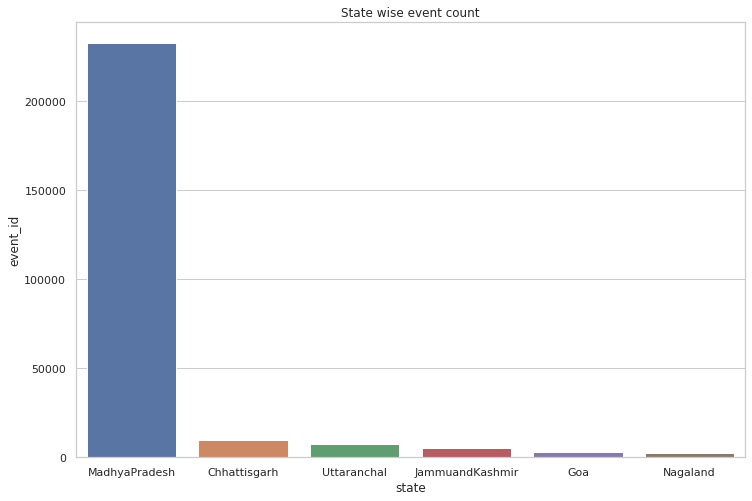

In [200]:
tmp=df_event_data.groupby(by='state')['event_id'].count().nlargest(8)
tmp=tmp.reset_index()
fig=plt.figure(figsize=(12,8))
sns.barplot(x='state', y='event_id', data=tmp)
plt.title('State wise event count')
plt.show()

As evident, Madhya Pradesh has recorded most events for mobile devices

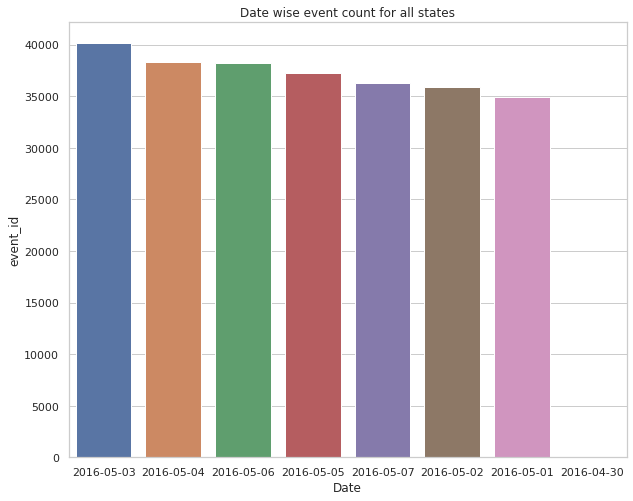

In [201]:
tmp=df_event_data.groupby(by='Date')['event_id'].count().nlargest(8)
tmp=tmp.reset_index()
fig=plt.figure(figsize=(10,8))
sns.barplot(x='Date', y='event_id', data=tmp)
plt.title('Date wise event count for all states')
plt.show()

Most of the event recorded on May 3 2016 and least on April 30 2016
Apart from 30 April, not much difference in the count in other dates.

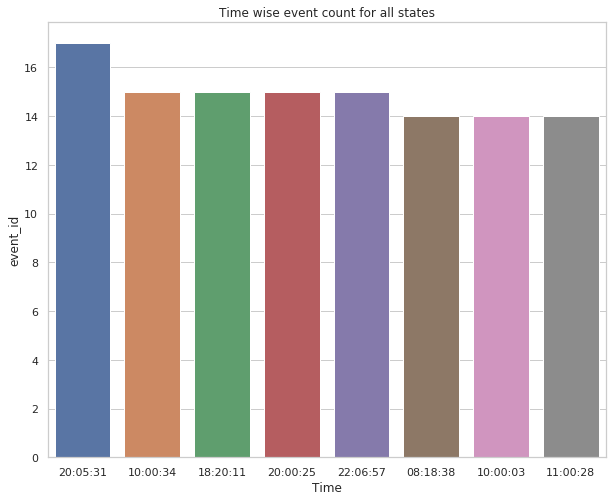

In [202]:
tmp=df_event_data.groupby(by='Time')['event_id'].count().nlargest(8)
tmp=tmp.reset_index()
fig=plt.figure(figsize=(10,8))
sns.barplot(x='Time', y='event_id', data=tmp)
plt.title('Time wise event count for all states')
plt.show()

The event logging seems uniform with respect to time, however, 08:05 PM has recorded most of the events

In [203]:
event_city_list=state_mp_list+state_cht_list+state_utr_list+state_jk_list+states_goa_list+states_ng_list
event_city_list

['Indore',
 'Raghogarh',
 'Sheopur',
 'Sidhi',
 'Sarni',
 'Betul',
 'Sehore',
 'Datia',
 'Dabra',
 'Guna',
 'Rewa',
 'Ratlam',
 'Bhind',
 'Itarsi',
 'Dhar',
 'Dewas',
 'Nagda',
 'Mandidip',
 'Damoh',
 'Murwara',
 'JabalpurCantonment',
 'Gwalior',
 'Tikamgarh',
 'Chhindwara',
 'Hoshangabad',
 'Shahdol',
 'Harda',
 'Jabalpur',
 'Shivapuri',
 'Nimach',
 'Shajapur',
 'Bhopal',
 'Sagar',
 'Morena',
 'Chhatarpur',
 'Ashoknagar',
 'Seoni',
 'Singrauli',
 'Balaghat',
 'Vidisha',
 'Jaora',
 'Mandsaur',
 'Khandwa',
 'Satna',
 'Burhanpur',
 'Basoda',
 'Khargone',
 'Sendhwa',
 'Gohad',
 'Ujjain',
 'Mau',
 'BinaEtawa',
 'Raipur',
 'Korba',
 'Raigarh',
 'Jagdalpur',
 'Bilaspur',
 'Bhilai',
 'Chirmiri',
 'Rajnandgaon',
 'Charoda',
 'Durg',
 'Ambikapur',
 'Dhamtari',
 'Pithoragarh',
 'Kashipur',
 'DehraDun',
 'Rurki',
 'DehraDunCantonment',
 'Haldwani',
 'Rishikesh',
 'Haridwar',
 'Anantnag',
 'Kathua',
 'Jammu',
 'Sopur',
 'Udhampur',
 'Baramula',
 'Srinagar',
 'Madgaon',
 'Mormugao',
 'Panaji',
 'Wo

**Analysis of gender_age_train dataset**

In [0]:
sql_gender_age="select * from gender_age_train where device_id in (select device_id from events_data where state in ('MadhyaPradesh','Chhattisgarh','Uttaranchal','JammuandKashmir','Goa','Nagaland'))"

In [0]:
df_gender_age_train=pd.DataFrame()

In [206]:
df_gender_age_train=get_data(sql_gender_age)

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


In [207]:
df_gender_age_train.head()

,device_id,gender,age,group
0,2313145512701915151,M,34,M32-38
1,-1539979963116391306,M,31,M29-31
2,-7731743086143077949,M,35,M32-38
3,-4370696809239943432,M,36,M32-38
4,2959524852145775517,M,30,M29-31


In [208]:
len(df_gender_age_train.device_id.unique())

4297

In [209]:
device_id_list_gender_age=list(df_gender_age_train.device_id.unique())
device_id_list_gender_age[0:5]

[2313145512701915151,
 -1539979963116391306,
 -7731743086143077949,
 -4370696809239943432,
 2959524852145775517]

In [210]:
df_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 4 columns):
device_id    4297 non-null int64
gender       4297 non-null object
age          4297 non-null int64
group        4297 non-null object
dtypes: int64(2), object(2)
memory usage: 134.4+ KB


In [211]:
df_gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [212]:
df_gender_age_train[df_gender_age_train.device_id<0].count()

device_id    2222
gender       2222
age          2222
group        2222
dtype: int64

2222 device_id are -ve out of 4297

In [213]:
df_gender_age_train.groupby(by='gender')['device_id'].count()

gender
F    1595
M    2702
Name: device_id, dtype: int64

In [214]:
tmp=pd.DataFrame(df_gender_age_train.groupby(by='gender')['device_id'].count())
tmp=tmp.reset_index()
tmp

,gender,device_id
0,F,1595
1,M,2702


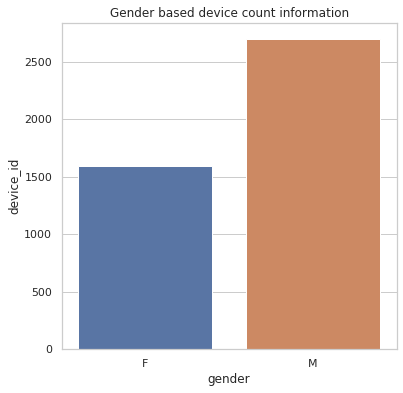

In [215]:
fig=plt.figure(figsize=(6,6))
sns.barplot(x='gender', y='device_id' , data=tmp)
plt.title("Gender based device count information")
plt.show()

In [216]:
df_gender_age_train.groupby(by='age').count().sort_values(by='device_id')

,device_id,gender,group
age,,,
6,1,1,1
79,1,1,1
78,1,1,1
74,1,1,1
70,1,1,1
...,...,...,...
30,223,223,223
26,238,238,238
25,244,244,244


In [217]:
tmp=df_gender_age_train.groupby(by='age')['device_id'].count()
tmp=tmp.reset_index()
tmp

,age,device_id
0,6,1
1,10,1
2,11,1
3,12,1
4,14,2
...,...,...
63,75,2
64,78,1
65,79,1
66,83,1


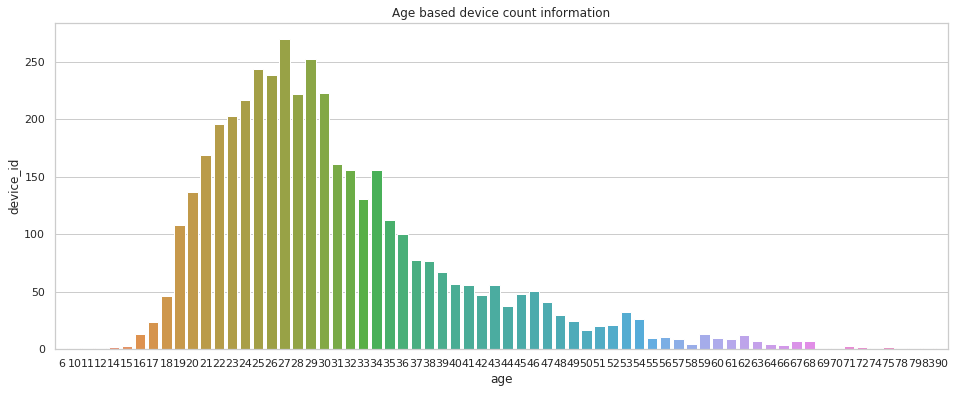

In [218]:
fig=plt.figure(figsize=(16,6))
sns.barplot(x='age', y='device_id' , data=tmp)
plt.title("Age based device count information")
plt.show()

In [219]:
df_gender_age_train.groupby(by='age')['device_id'].count().nlargest(10)

age
27    270
29    252
25    244
26    238
30    223
28    222
24    217
23    203
22    196
21    169
Name: device_id, dtype: int64

In [220]:
df_gender_age_train.groupby(by='age')['device_id'].count().nsmallest(15)

age
6     1
10    1
11    1
12    1
69    1
70    1
74    1
78    1
79    1
83    1
90    1
14    2
72    2
75    2
15    3
Name: device_id, dtype: int64

In [221]:
df_gender_age_train.device_id=df_gender_age_train.device_id.abs()
len(df_gender_age_train.device_id.unique())

4297

In [222]:
#Split group data into 2 columns
df_gender_age_train['group gender']=df_gender_age_train.group.str[0]
df_gender_age_train['group age']=df_gender_age_train.group.str[1:]
df_gender_age_train.drop('group', axis=1, inplace=True)
df_gender_age_train.head()

,device_id,gender,age,group gender,group age
0,2313145512701915151,M,34,M,32-38
1,1539979963116391306,M,31,M,29-31
2,7731743086143077949,M,35,M,32-38
3,4370696809239943432,M,36,M,32-38
4,2959524852145775517,M,30,M,29-31


In [223]:
df_gender_age_train[(df_gender_age_train.gender!=df_gender_age_train['group gender'])]

,device_id,gender,age,group gender,group age


Gender in group age matches with values in gender column, so group gender can be droppped

In [0]:
df_gender_age_train.drop('group gender', axis=1, inplace=True)

In [225]:
df_gender_age_train.head()

,device_id,gender,age,group age
0,2313145512701915151,M,34,32-38
1,1539979963116391306,M,31,29-31
2,7731743086143077949,M,35,32-38
3,4370696809239943432,M,36,32-38
4,2959524852145775517,M,30,29-31


In [226]:
df_gender_age_train.groupby(by='group age').count()

,device_id,gender,age
group age,,,
22-,449,449,449
23-,337,337,337
23-26,578,578,578
24-26,240,240,240
27-28,492,492,492
29-31,388,388,388
29-32,299,299,299
32-38,548,548,548
33-42,306,306,306


In [0]:
mydict={}
for val in df_gender_age_train['group age']:
    mydict[val]=list(df_gender_age_train[df_gender_age_train['group age']==val]['age'].unique())

In [228]:
df_gender_age_train.groupby(by='group age')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
group age,,,,,,,,
22-,449.0,20.126949,1.857516,6.0,19.0,20.0,22.0,22.0
23-,337.0,21.080119,1.781884,11.0,20.0,21.0,22.0,23.0
23-26,578.0,24.619377,1.095337,23.0,24.0,25.0,26.0,26.0
24-26,240.0,25.012500,0.805220,24.0,24.0,25.0,26.0,26.0
27-28,492.0,27.451220,0.498121,27.0,27.0,27.0,28.0,28.0
29-31,388.0,29.912371,0.785891,29.0,29.0,30.0,31.0,31.0
29-32,299.0,30.150502,1.111604,29.0,29.0,30.0,31.0,32.0
32-38,548.0,34.474453,1.912454,32.0,33.0,34.0,36.0,38.0
33-42,306.0,36.833333,2.864423,33.0,34.0,36.0,39.0,42.0


In [229]:
list(df_gender_age_train[(df_gender_age_train.age<=22)]['age'].unique())

[22, 20, 17, 21, 19, 18, 16, 10, 15, 11, 14, 6, 12]

In [230]:
mydict['22-']

[22, 20, 17, 21, 19, 18, 16, 10, 15, 14, 6, 12]

In [231]:
df_gender_age_train[df_gender_age_train.age==11]['group age']

3194    23-
Name: group age, dtype: object

When checking for age group column, 11 is not included in that group, which results in the difference in the count when grouping based on age group column and grouping based on age column

11 has age group column value of '23-'

In [0]:
list(df_gender_age_train[(df_gender_age_train.age<=23)]['age'].unique())

[23, 22, 20, 17, 21, 19, 18, 16, 10, 15, 11, 14, 6, 12]

In [0]:
mydict['23-']

[23, 21, 20, 22, 19, 18, 17, 16, 11, 14]

Similarly, age values - 10,15,6 and 12 dont have age group value '23-' and hence the count is different

In [0]:
df_gender_age_train[(df_gender_age_train.age>=23) & (df_gender_age_train.age<=26)].count()

device_id    902
gender       902
age          902
group age    902
dtype: int64

In [0]:
mydict['23-26']

[24, 26, 25, 23]

In [233]:
df_gender_age_train[df_gender_age_train['group age']=='23-26'].count()

device_id    578
gender       578
age          578
group age    578
dtype: int64

In [234]:
df_gender_age_train[(df_gender_age_train.age>=23) & (df_gender_age_train.age<=26)].count()

device_id    902
gender       902
age          902
group age    902
dtype: int64

For group age '23-26' also, the count is not matching

In [235]:
df_gender_age_train[df_gender_age_train['group age']=='27-28'].count()

device_id    492
gender       492
age          492
group age    492
dtype: int64

In [237]:
df_gender_age_train[(df_gender_age_train.age>=27) & (df_gender_age_train.age<=28)].count()

device_id    492
gender       492
age          492
group age    492
dtype: int64

**Plotting count of group age and age column**

In [261]:
df_age_group=pd.DataFrame(df_gender_age_train.groupby('group age')['device_id'].count())
df_age_group.columns=['age group count']
df_age_group

,age group count
group age,
22-,449
23-,337
23-26,578
24-26,240
27-28,492
29-31,388
29-32,299
32-38,548
33-42,306


In [262]:
x1=df_gender_age_train[df_gender_age_train.age<=22]['device_id'].count()
x2=df_gender_age_train[df_gender_age_train.age<=23]['device_id'].count()
x3=df_gender_age_train[(df_gender_age_train.age>=23) & (df_gender_age_train.age<=26)]['device_id'].count()
x4=df_gender_age_train[(df_gender_age_train.age>=24) & (df_gender_age_train.age<=26)]['device_id'].count()
x5=df_gender_age_train[(df_gender_age_train.age>=27) & (df_gender_age_train.age<=28)]['device_id'].count()
x6=df_gender_age_train[(df_gender_age_train.age>=29) & (df_gender_age_train.age<=31)]['device_id'].count()
x7=df_gender_age_train[(df_gender_age_train.age>=29) & (df_gender_age_train.age<=32)]['device_id'].count()
x8=df_gender_age_train[(df_gender_age_train.age>=32) & (df_gender_age_train.age<=38)]['device_id'].count()
x9=df_gender_age_train[(df_gender_age_train.age>=33) & (df_gender_age_train.age<=42)]['device_id'].count()
x10=df_gender_age_train[(df_gender_age_train.age>=39)]['device_id'].count()
x11=df_gender_age_train[(df_gender_age_train.age>=43)]['device_id'].count()
df_age_group['age count']=[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]
df_age_group

,age group count,age count
group age,,
22-,449,702
23-,337,905
23-26,578,902
24-26,240,699
27-28,492,492
29-31,388,636
29-32,299,792
32-38,548,810
33-42,306,881


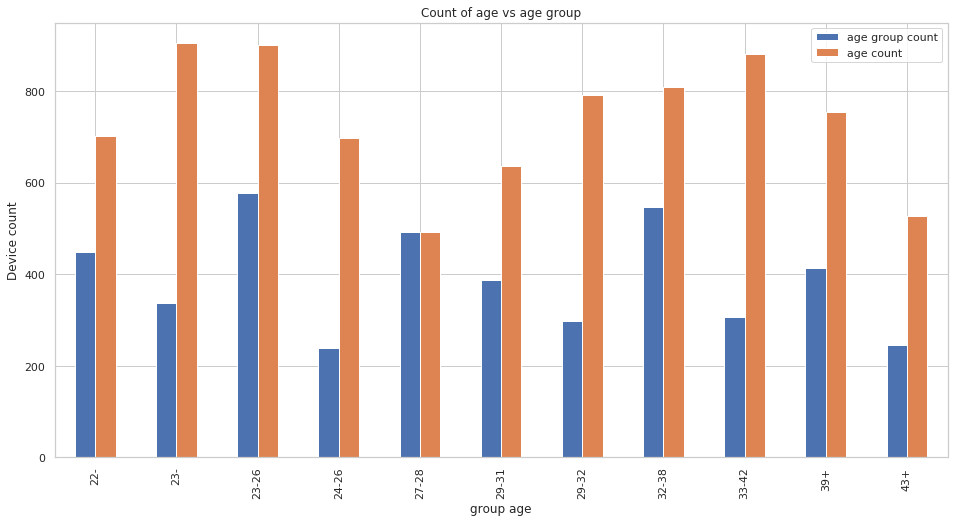

In [299]:
plt.rcParams['figure.figsize']=(16,8)
df_age_group.plot.bar()
plt.title('Count of age vs age group')
plt.ylabel("Device count")
plt.show()

For group age = '27-28' count (492) matches

The count of records matched with age group for 27-28 (492), but not matching some other age groups

**Combined analysis on gender_age_train dataset**

- No NULL values
- 4927 device_id not matching with count of device_id in events_data(4298)
- After removing -ve from device_id(count=2222), no duplicate records
- The group column data seems inconsistent and can be dropped.
- Age with 27,29,25,26 have highest record count
- Age with 6,10,11,12,69,70,74,78,79,83,90 have lowest count of 1 each
- 1595 records for female
- 2702 records for male

**Analysis of phone_brand_device_model dataset**

In [0]:
sql_phone_brand="select * from phone_brand_device_model where device_id in (select device_id from events_data where state in ('MadhyaPradesh','Chhattisgarh','Uttaranchal','JammuandKashmir','Goa','Nagaland'))"

In [0]:
df_phone_brand_device_model=pd.DataFrame()

In [268]:
df_phone_brand_device_model=get_data(sql_phone_brand)

Connected to MySQL Server version 5.6.46-cll-lve
MySQL connection is closed


In [269]:
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,2313145512701915151,vivo,Xplay
1,-1539979963116391306,小米,GN708W
2,-7731743086143077949,小米,红米
3,-4370696809239943432,小米,MI 2S
4,2959524852145775517,三星,A850


In [270]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 3 columns):
device_id       4297 non-null int64
phone_brand     4297 non-null object
device_model    4297 non-null object
dtypes: int64(1), object(2)
memory usage: 100.8+ KB


In [289]:
brand_list=list(df_phone_brand_device_model.phone_brand)
brand_list[0:5]

['vivo', '小米', '小米', '小米', '三星']

In [290]:
len(brand_list)

4297

In [0]:
model_list=list(df_phone_brand_device_model.device_model)

In [288]:
model_list[0:5]

['Xplay', 'GN708W', '红米', 'MI 2S', 'A850']

In [287]:
len(model_list)

4297

In [275]:
!pip install googletrans

import googletrans
from googletrans import Translator

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=1a1a93ba13f1e1387ef86b60e3743a8de3a32b31ed7499223f90d8e147a07e18
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [0]:
def translate_values(input_list):
    output_list=[]
    for val in input_list:
        translator = Translator()
        translated=""
        print("Original :", val)
        try:
            translated=translator.translate(val, dest='en')
            print("Changed :", translated.text)
            output_list.append(translated.text)
        except Error as e:
            print("Error :", e)
            print("Using original :", val)
            output_list.append(val)
        finally:
            print ("\n")

    return output_list

**Translation from  chinse to english for phone brands**

In [301]:
converted_brand_list=translate_values(brand_list)
converted_brand_list

Original : vivo




JSONDecodeError: ignored

In [279]:
converted_brand_list

['vivo',
 'Millet',
 'Samsung',
 'Meizu',
 'Huawei',
 'Cool',
 'OPPO',
 'hammer',
 'HTC',
 'Duo CD',
 'Associate',
 'LG',
 'Nubian',
 'Cool odd',
 'Quality rice',
 'Easy to send',
 'TV Plus',
 'China Mobile',
 'One hundred Li & Fung',
 'CUBE',
 'Bacardi',
 'TCL',
 'Lovme',
 'Mito',
 'Koku珀',
 "O'Brien letter",
 'A plus',
 'Language letter',
 'Ai Unocal',
 'InFocus',
 'Hisense',
 'Amagatarai',
 'Doo',
 'Township meters',
 'M song',
 'Dimensional map',
 'Newman',
 'Motorola',
 'Nokia',
 'Love Pyle',
 'Amoi',
 'Dream meters',
 'Green Orange',
 'Small poplar',
 'If the meter',
 'ASUS',
 'waveguide',
 'Scallion',
 'Banghua',
 'Femtosecond',
 'Bellefonte',
 'Shouyun',
 'SUGAR',
 'Haier',
 'PPTV',
 'E school',
 'black rice',
 'Ou',
 '亿通',
 'pioneer']

**Translation  from chinese to english for device models**

In [280]:
converted_model_list=translate_values(model_list)

Original : Xplay
Changed : Xplay


Original : GN708W
Changed : GN708W


Original : 红米
Changed : Red rice


Original : MI 2S
Changed : MI 2S


Original : A850
Changed : A850


Original : MX3
Changed : Maxa


Original : Xshot
Changed : Xshot


Original : G730-T00
Changed : G730-T00


Original : 7296
Changed : 7296


Original : 红米note
Changed : Red rice note


Original : R7
Changed : Rah


Original : Galaxy Note 3
Changed : Galaxy Note 3


Original : X6 D
Changed : X6 D


Original : Y20T
Changed : Y20T


Original : Y11IT
Changed : Y11IT


Original : 大神F1
Changed : Okami F1


Original : Galaxy Note 2
Changed : Galaxy Note 2


Original : MI 3
Changed : MI 3


Original : A889
Changed : I cut


Original : 5951
Changed : 5951


Original : MI 2A
Changed : MI 2A


Original : Galaxy S3
Changed : Galaxy S3


Original : Galaxy Grand 2
Changed : Galaxy Grand 2


Original : 红米1S
Changed : Red rice 1S


Original : 荣耀3C
Changed : 3C glory


Original : X805
Changed : X805


Original : Galaxy Note 3 Lite

In [281]:
converted_model_list

['Xplay',
 'GN708W',
 'Red rice',
 'MI 2S',
 'A850',
 'Maxa',
 'Xshot',
 'G730-T00',
 '7296',
 'Red rice note',
 'Rah',
 'Galaxy Note 3',
 'X6 D',
 'Y20T',
 'Y11IT',
 'Okami F1',
 'Galaxy Note 2',
 'MI 3',
 'I cut',
 '5951',
 'MI 2A',
 'Galaxy S3',
 'Galaxy Grand 2',
 'Red rice 1S',
 '3C glory',
 'X805',
 'Galaxy Note 3 Lite',
 'Grand View 4',
 'Rt 007',
 'MI 4',
 'Galaxy Win',
 'MI 1S',
 'MY 2',
 'Y11',
 'S2 HD LTE E120S Galaxy',
 'Elife E6 mini',
 'MX4',
 'T1',
 'Red rice 2A',
 '1cm',
 'Ascend G6',
 'Glory Play 4X',
 'A820t',
 'N1 Mini',
 'Desire 816',
 'R1',
 'Ascend G700T',
 'MX4 Pro',
 'R1S',
 'Blue Charm',
 'Mate 7',
 'Glory 6',
 'Galaxy S4',
 'A 199',
 'X5L',
 'Taaqo',
 'Red Rice 2',
 'Find 7',
 'Glory Play 4',
 'Charm blue metal',
 'R1C',
 'Galaxy Mega 2',
 'Red rice note enhanced version',
 'Aae 0 T',
 'Galaxy Trend DUOS',
 'G520-5000',
 'Sdd 17 j',
 'R3',
 'Galaxy Mega 5.8',
 'Thousands Give',
 'Galaxy S5',
 'With satisfaction',
 'Jte0-Lhkh',
 '7231',
 'Y11IW',
 'Revelation 0

In [282]:
len(converted_brand_list)

60

In [283]:
len(converted_model_list)

676

In [285]:
df_phone_brand_device_model['eng_phone_brand']=converted_brand_list
df_phone_brand_device_model['end_device_model']=converted_model_list
df_phone_brand_device_model.head()

ValueError: ignored

**Events_data and gender_age_train - getting the age group for top device_id for each state**

In [0]:
mp_top_device=list(mp_top5_device_event.device_id)
cht_top_device=list(cht_top5_device_event.device_id)
utr_top_device=list(utr_top5_device_event.device_id)
jk_top_device=list(jk_top5_device_event.device_id)
goa_top_device=list(goa_top5_device_event.device_id)
nag_top_device=list(ng_top5_device_event.device_id)

In [0]:
mp_top_device=[int(i) for i in mp_top_device]
cht_top_device=[int(i) for i in cht_top_device]
utr_top_device=[int(i) for i in utr_top_device]
jk_top_device=[int(i) for i in jk_top_device]
goa_top_device=[int(i) for i in goa_top_device]
nag_top_device=[int(i) for i in nag_top_device]

In [0]:
mp_dev_filter=df_gender_age_train.device_id.isin(mp_top_device)
cht_dev_filter=df_gender_age_train.device_id.isin(cht_top_device)
utr_dev_filter=df_gender_age_train.device_id.isin(utr_top_device)
jk_dev_filter=df_gender_age_train.device_id.isin(jk_top_device)
goa_dev_filter=df_gender_age_train.device_id.isin(goa_top_device)
nag_dev_filter=df_gender_age_train.device_id.isin(nag_top_device)

In [314]:
x=df_gender_age_train[mp_dev_filter | cht_dev_filter | utr_dev_filter |  jk_dev_filter | goa_dev_filter | nag_dev_filter][['device_id','age']]
x

,device_id,age
654,3751556080923780612,21
723,9132041579920627992,25
1578,2676119753740865787,25
1809,130313677513796529,31
2489,2243613946498943264,27
3010,5213783467221875757,23
3189,3992361992277142040,40
3369,3738280493453802895,19
3743,4850278293934252512,32
3757,7011237962868114666,26


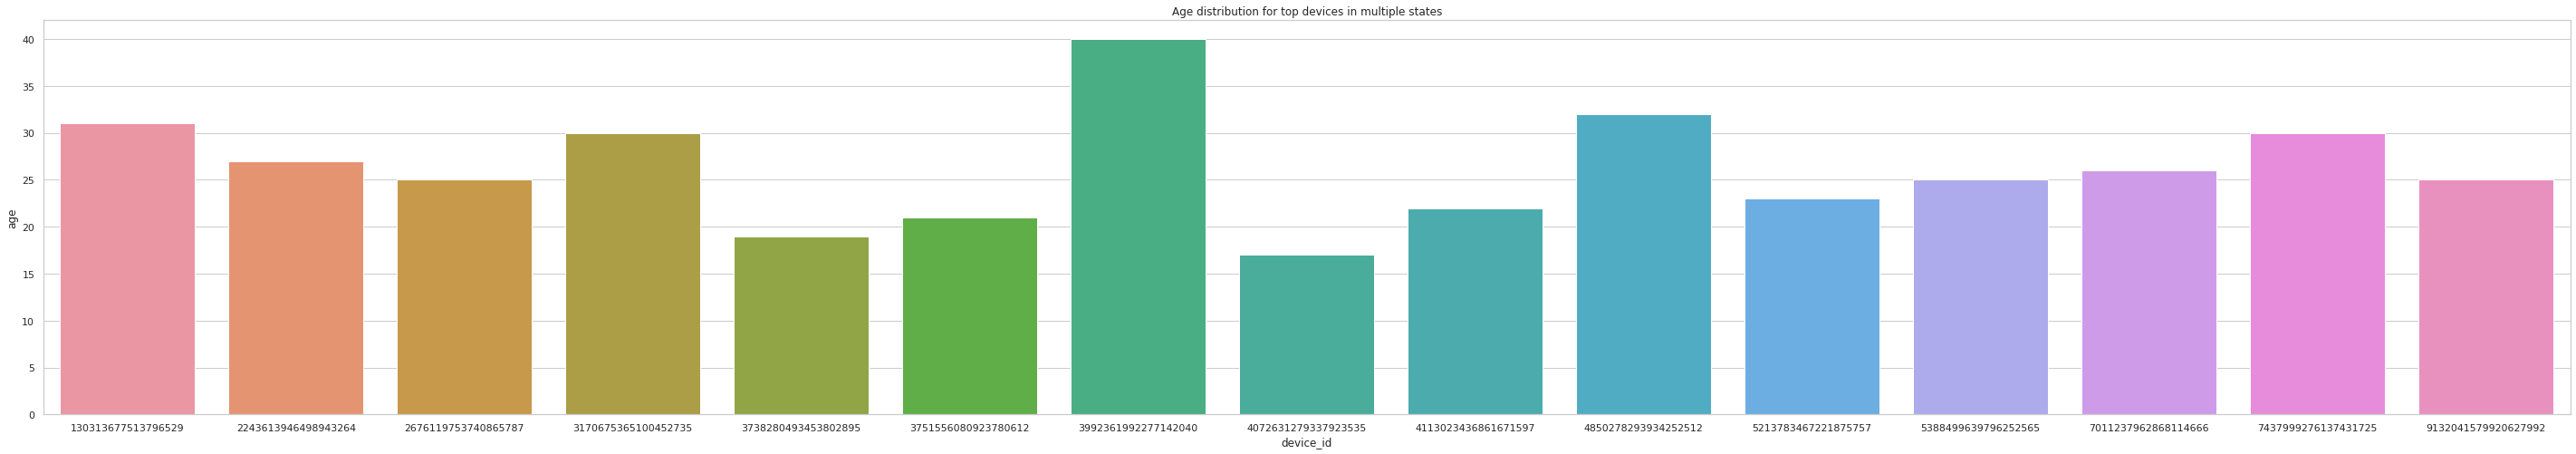

In [317]:
fig=plt.figure(figsize=(50, 8))
sns.barplot(x='device_id', y='age', data=x)
plt.title("Age distribution for top devices in multiple states")
plt.show()